<a id='Top'></a>
__Table of Content:__
<br>[1. Imports](#Imports)
<br>[2. Data Processing](#Data-Processing)
<br>&emsp;&emsp;[2.1. Dropping Columns](#Dropping-Columns)
<br>&emsp;&emsp;[2.2. Creating New Columns](#Creating-New-Columns)
<br>&emsp;&emsp;[2.3. Converting to Suitable Datatypes](#Converting-to-Suitable-Datatypes)
<br>&emsp;&emsp;[2.4. Converting to Categorical Variables](#Converting-to-Categorical-Variables)
<br>&emsp;&emsp;[2.5. Handling Missing Data](#Handling-Missing-Data)
<br>[3. Reviews Sentiment Analysis](#Reviews-Sentiment-Analysis)
<br>[4. Observation of Predicted Variable](#Observation-of-Predicted-Variable)
<br>[5. Exploratory Data Analysis](#Exploratory-Data-Analysis)
<br>&emsp;&emsp;[5.1. Reviews Analysis](#Reviews-Analysis)
<br>&emsp;&emsp;[5.2. Feature Visualization](#Feature-Visualization)
<br>[6. Modelling & Analysis](#Modelling-&-Analysis)
<br>&emsp;&emsp;[6.1. Feature Preparation for Modelling](#Feature-Preparation-for-Modelling)
<br>&emsp;&emsp;[6.2. Modelling Using GridSearch](#Modelling-Using-GridSearch)
<br>&emsp;&emsp;[6.3. Analysis of Best Model](#Analysis-of-Best-Model)
<br>[7. Conclusion](#Conclusion)

## Imports

In [1]:
# Imports for basic python features
import pandas as pd
import numpy as np
import regex as re
from dateutil import parser

# Imports for visualisation
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
sns.set()

# Imports for text engineering
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud
from collections import Counter
from wordcloud import WordCloud

# Imports for feature engineering
from geopy.distance import vincenty
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Imports for modelling
from scipy import stats
from scipy.stats import skew, norm
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNet, LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from xgboost import plot_importance
import xgboost as xgb

# Import to remove warnings
import warnings
warnings.filterwarnings("ignore")

# Jupyter notebook settings
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Import merged listings and reviews file from scraped data
listings = pd.read_csv(r'../Asset/listing_merged.csv')
reviews = pd.read_csv(r'../Asset/reviews_merged.csv')

In [3]:
listings.sample(3, random_state=42)

id                            listing_url       scrape_id last_scraped                                               name                                            summary                                              space                                        description experiences_offered                              neighborhood_overview                                              notes                                            transit                              access                                        interaction                                        house_rules thumbnail_url medium_url                                        picture_url xl_picture_url      host_id                                     host_url    host_name  host_since                      host_location                              host_about  host_response_time host_response_rate host_acceptance_rate host_is_superhost                                 host_thumbnail_url  \
66856  2.75086e+07  https://www.airbnb.com/rooms/27508555  20190306152833   2019-03-07  *Bright Modern Tulum Lux 3beds2bath <3 of Chel...  Inspired by the bohemian vibe of Tulum, this l...  This bright and private apartment offers a spa...  Inspired by the bohemian vibe of Tulum, this l...                none  Chelsea is one of the most coveted neighborhoo...                                                NaN  Metro Lines A, C, E, L, F, M, 1, 2, 3 are all ...                                 NaN                                                NaN                                                NaN           NaN        NaN  https://a0.muscache.com/im/pictures/44b8dea2-2...            NaN  195389383.0  https://www.airbnb.com/users/show/195389383  Maria & Sam  2018-06-13                                 US                                     NaN      within an hour               100%                  NaN                 t  https://a0.muscache.com/im/pictures/user/4d0ab...   
71964   2.6844e+07  https://www.airbnb.com/rooms/26843965  20190109045126   2019-01-09      Furnished Gorgeous 4 Bedroom 2 Bath Apartment  Fully furnished gorgeous 4 bedrooms Located in...  - This apartment is the perfect space for you ...  Fully furnished gorgeous 4 bedrooms Located in...                none  NEIGHBORHOOD  It only takes a short walk along...          Linens(bedding and towels) are  provided.                                                NaN                                 NaN  **To complete booking you will need to complet...                                                NaN           NaN        NaN  https://a0.muscache.com/im/pictures/7744072c-9...            NaN  199689347.0  https://www.airbnb.com/users/show/199689347         Sara  2018-07-03  New York, New York, United States  Young professional renting out places.  within a few hours               100%                  NaN                 f  https://a0.muscache.com/im/pictures/user/fff41...   
63630     17011237  https://www.airbnb.com/rooms/17011237  20190403130309   2019-04-04                        Bedford Ave - L train/Ferry  Located in the heart of Williamsburg!  Just a ...  This is a monthly rental. It is daily availabl...  Located in the heart of Williamsburg!  Just a ...                none                                                NaN  This house have a SECURITY CAMERAS in the fron...                                                NaN  Living room, kitchen and backyard.                                                NaN  - Do not bring the party home.  - No candles i...           NaN        NaN  https://a0.muscache.com/im/pictures/1c17be08-1...            NaN   51779729.0   https://www.airbnb.com/users/show/51779729       Andrew  2015-12-20  New York, New York, United States                                     NaN      within an hour               100%                  NaN                 f  https://a0.muscache.com/im/pictures/92c93755-f...   

                                        host_picture_url host_neighbourhood  host_l

In [4]:
listings.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82579 entries, 0 to 82578
Data columns (total 106 columns):
id                                              82576 non-null object
listing_url                                     82576 non-null object
scrape_id                                       82576 non-null object
last_scraped                                    82574 non-null object
name                                            82553 non-null object
summary                                         78692 non-null object
space                                           57433 non-null object
description                                     80702 non-null object
experiences_offered                             82579 non-null object
neighborhood_overview                           51384 non-null object
notes                                           32374 non-null object
transit                                         51584 non-null object
access                                          43

In [5]:
reviews.sample(3, random_state=42)

listing_id         id        date  reviewer_id reviewer_name                                           comments
1101873    30681498  488042865  2019-07-14    267480380         Franz  Hosts were nice and responded quickly to my me...
432277      7160363  139444999  2017-03-25      2062958         Peter  Andreias's place was all I needed for my stay ...
826659     19192149  181939357  2017-08-13     81291879     Dimitrije  Very nice neighborhood close to Columbia Unive...

In [6]:
reviews.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697734 entries, 0 to 1697733
Data columns (total 6 columns):
listing_id       1697734 non-null int64
id               1697734 non-null int64
date             1697734 non-null object
reviewer_id      1697734 non-null int64
reviewer_name    1697731 non-null object
comments         1695742 non-null object
dtypes: int64(3), object(3)
memory usage: 77.7+ MB


## Data Processing
[To Top](#Top)

Data Engineering will include:
<br>1) Dropping columns that have little statistical value (e.g. low non-null values, low variance in data)
<br>2) Creating new columns that likely have effect on price (e.g. distance to city center)
<br>3) Converting datatypes (e.g. strings to integers where applicable)
<br>4) Converting categorical variables to ordinal variables
<br>5) Dealing with missing data

### Dropping Columns

In [7]:
# Dropping columns that have little to no non-null values, as they have little statistical values
listings.drop(['thumbnail_url','medium_url','license', 'host_acceptance_rate',
               'jurisdiction_names','xl_picture_url','square_feet'],axis=1,inplace=True)

In [8]:
# Dropping 'url' columns that have no value in the modelling
listings.drop(['listing_url', 'picture_url', 'host_url',
               'host_thumbnail_url', 'host_picture_url'],axis=1,inplace=True)

In [9]:
# Dropping columns with duplicate/similar information
listings.drop(['scrape_id','host_name','host_id','host_location','host_about','host_neighbourhood','street','neighbourhood',
               'state','zipcode','market','smart_location','country_code','country','is_location_exact','weekly_price','monthly_price',
               'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
               'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','calendar_last_scraped',
               'number_of_reviews_ltm','notes','first_review','last_review','host_total_listings_count','is_business_travel_ready',
               'has_availability'],axis=1,inplace=True)

In [10]:
# Removing chosen rows with null data (~100 entries)
listings.dropna(axis=0, how='any', subset=['city','bathrooms','bedrooms','beds'], inplace=True)

In [11]:
listings.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82237 entries, 0 to 82578
Data columns (total 62 columns):
id                                              82234 non-null object
last_scraped                                    82232 non-null object
name                                            82212 non-null object
summary                                         78466 non-null object
space                                           57186 non-null object
description                                     80397 non-null object
experiences_offered                             82237 non-null object
neighborhood_overview                           51254 non-null object
transit                                         51443 non-null object
access                                          43721 non-null object
interaction                                     46731 non-null object
house_rules                                     47561 non-null object
host_since                                      822

### Creating New Columns

In [12]:
# Creation of column with host's number of verification platforms
listings['host_verification_level'] = listings.host_verifications.apply(lambda s: len(s.split(', ')))

In [13]:
# Dropping rows with missing values
listings.dropna(axis=0, how='any', subset=['host_since'], inplace=True)
listings.dropna(axis=0, how='any', subset=['last_scraped'], inplace=True)

# Creating new 'host_exp' column with the number of days of experience the host has
listings['host_exp'] = listings.last_scraped.apply(lambda s: parser.parse(s)) - listings.host_since.apply(lambda s: parser.parse(s))
listings.host_exp = listings.host_exp.astype(str).apply(lambda s: int(s.split(' ')[0]))

In [14]:
# Creation of column with number of amenities
listings['amenities_count'] = listings.amenities.apply(lambda s: len(str(s)[1:].split(',')))

In [15]:
# Creation of column with coorindates of New York's city central (Lower Manhattan)
listings['lat_center'] = 40.7142700
listings['lon_center'] = -74.0059700

In [16]:
# Calculates distance between a listing and the city central, using Vicenty
listings['dist_to_center'] = listings.apply(lambda x: vincenty((x['latitude'], x['longitude']), (x['lat_center'], x['lon_center'])).km, axis = 1)

In [17]:
listings['dist_to_center']

0        11.831229
1         5.071183
3         4.538893
5         5.895526
6        10.253744
           ...    
82574    16.956885
82575     6.772700
82576    13.647277
82577     5.281364
82578    11.989677
Name: dist_to_center, Length: 82208, dtype: float64

In [18]:
# Dropping of all redundant columns
listings.drop(['lat_center','lon_center','latitude','longitude','amenities','host_since','last_scraped','host_verifications'],axis=1,inplace=True)

###  Converting to Suitable Datatypes

In [19]:
# Unique values in 'host_response_rate'
listings.host_response_rate.unique()

array(['0%', '92%', '78%', '90%', nan, '100%', '94%', '33%', '88%', '89%',
       '70%', '60%', '50%', '67%', '98%', '97%', '95%', '75%', '87%',
       '80%', '81%', '57%', '63%', '86%', '82%', '71%', '77%', '31%',
       '55%', '93%', '25%', '83%', '79%', '20%', '96%', '76%', '40%',
       '64%', '43%', '91%', '85%', '84%', '30%', '54%', '73%', '62%',
       '58%', '38%', '29%', '74%', '53%', '44%', '27%', '56%', '17%',
       '10%', '32%', '69%', '99%', '48%', '9%', '47%', '59%', '19%',
       '14%', '41%', '22%', '52%', '35%', '46%', '42%', '13%', '61%',
       '23%', '68%', '15%', '72%', '65%', '28%', '36%', '37%', '51%',
       '49%', '11%', '18%', '66%', '39%', '16%', '8%', '45%', '7%', '34%',
       '4%', '21%', '26%', '12%', '3%', '5%'], dtype=object)

In [20]:
# Creating function for converting rate based columns into integer type
def rate_to_float(string):
    numeric = float(str(string).replace(',', '').split('%')[0])
    return numeric

In [21]:
# Calling function on 'host_response_rate'
for string in ['host_response_rate']:
    listings[string] = listings[string].apply(rate_to_float)

In [22]:
listings['host_response_rate'].head(10)

0       0.0
1      92.0
3      78.0
5      90.0
6       NaN
7     100.0
8     100.0
9     100.0
10     94.0
11    100.0
Name: host_response_rate, dtype: float64

In [23]:
listings.price.head(10)

0     $150.00
1      $89.00
3     $200.00
5      $79.00
6      $79.00
7     $116.00
8     $150.00
9     $135.00
10     $85.00
11     $89.00
Name: price, dtype: object

In [24]:
# Creating function for converting price based columns into integer type
def price_to_float(string):
    numeric = float(str(string).replace(',', '').split('$')[-1])
    return numeric

In [25]:
# Calling function on several columns, including price
for string in ['price','security_deposit','cleaning_fee','extra_people']:
    listings[string] = listings[string].apply(price_to_float)

In [26]:
listings.price

0        150.0
1         89.0
3        200.0
5         79.0
6         79.0
         ...  
82574    200.0
82575    109.0
82576     68.0
82577    125.0
82578     64.0
Name: price, Length: 82208, dtype: float64

### Converting to Categorical Variables

By comparing the groupy-by mean property prices across the categories in 'property_type', 'neighbourhood' and 'city' separately, there is a clear observable trend. The categories are converted to ordinal categories.

In [27]:
listings.groupby('property_type')['price'].mean().sort_values().head(20)

property_type
Minsu (Taiwan)             37.500000
Dorm                       38.000000
Treehouse                  40.000000
Pension (South Korea)      46.000000
Dome house                 65.000000
Earth house                65.125000
Hostel                     70.442478
Nature lodge               75.000000
Train                      90.000000
Casa particular            90.000000
Tiny house                 92.633333
Camper/RV                 100.411765
Casa particular (Cuba)    101.181818
Bed and breakfast         102.176829
Barn                      105.000000
Yurt                      116.500000
Guest suite               125.330020
House                     125.400451
Guesthouse                142.752381
Cottage                   146.363636
Name: price, dtype: float64

In [28]:
# Converting property type to ordinal variables
for x,y in enumerate(listings.groupby('property_type')['price'].mean().sort_values().index):
    listings.property_type.replace(to_replace=str(y),value=x,inplace=True)

In [29]:
listings.property_type

0        20
1        16
3        20
5        20
6        20
         ..
82574    20
82575    20
82576    20
82577    20
82578    20
Name: property_type, Length: 82208, dtype: int64

In [30]:
listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values().head(20)

neighbourhood_cleansed
Pleasant Plains    39.000000
Tremont            49.833333
Soundview          52.166667
Mount Eden         58.333333
Hunts Point        59.961538
Concord            61.517241
New Dorp           62.333333
Corona             62.646018
Emerson Hill       63.000000
Woodlawn           63.176471
Gravesend          63.526946
Arden Heights      63.800000
Grant City         64.636364
Silver Lake        65.000000
New Dorp Beach     65.571429
Olinville          67.000000
Rossville          67.500000
Borough Park       68.695167
Schuylerville      69.076923
Fordham            69.459184
Name: price, dtype: float64

In [31]:
# Converting neighbourhood to ordinal variables
for x,y in enumerate(listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values().index):
    listings.neighbourhood_cleansed.replace(to_replace=str(y),value=x,inplace=True)

In [32]:
listings.neighbourhood_cleansed

0        138
1        183
3        200
5        198
6        191
        ... 
82574    152
82575    133
82576    206
82577    175
82578     41
Name: neighbourhood_cleansed, Length: 82208, dtype: int64

In [33]:
listings.groupby('city')['price'].mean().sort_values().head(20)

city
Springfield gardens          24.0
Little neck                  32.0
Longislandcity               34.0
Bklyn NY                     34.0
New York East Elmhurst       35.0
Mott Haven                   35.0
bronx                        35.0
WOODSIDE                     35.0
forest hills/corona          36.0
Far Rockaway , Bayswater     37.0
Queensvillage                37.0
Bronx New York               37.0
New York - Astoria           38.0
纽约法拉盛                        38.0
richmond hill                38.0
Queens ,East Elmhurst .      38.0
Cambria heights              39.0
布鲁克林                         39.0
NewYork                      40.0
Bedstuy                      40.0
Name: price, dtype: float64

In [34]:
# Converting cities to ordinal variables
for x,y in enumerate(listings.groupby('city')['price'].mean().sort_values().index):
    listings.city.replace(to_replace=str(y),value=x,inplace=True)

In [35]:
listings.city

0        408
1        331
3        408
5        408
6        408
        ... 
82574    282
82575    331
82576    320
82577    331
82578    282
Name: city, Length: 82208, dtype: int64

In [36]:
listings.neighbourhood_group_cleansed.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [37]:
# Convert neighbourhood_group_cleansed to ordinal categories
response_dict = {'Manhattan': 5, 
                 'Brooklyn': 4, 
                 'Staten Island': 3,
                 'Queens': 2,
                 'Bronx': 1
                }

listings.neighbourhood_group_cleansed.replace(response_dict, inplace=True)

In [38]:
listings.bed_type.unique()

array(['Pull-out Sofa', 'Real Bed', 'Futon', 'Airbed', 'Couch'],
      dtype=object)

In [39]:
# Convert bed_type to ordinal categories
response_dict = {'Real Bed': 5, 
                 'Couch': 4, 
                 'Airbed': 3,
                 'Pull-out Sofa': 2,
                 'Futon': 1
                }

listings.bed_type.replace(response_dict, inplace=True)

In [40]:
listings.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [41]:
# Convert room_type to ordinal categories
response_dict = {'Hotel room': 4, 
                 'Entire home/apt': 3, 
                 'Private room': 2,
                 'Shared room': 1
                }

listings.room_type.replace(response_dict, inplace=True)

In [42]:
listings.host_is_superhost.unique()

array(['f', 't'], dtype=object)

In [43]:
# Converting boolean values to binary
def boolean_to_binary(tf):
    if tf == 'f':
        return 0
    elif tf == 't':
        return 1

In [44]:
# Calling function on several boolean categories
for col in ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'requires_license','instant_bookable',
            'require_guest_profile_picture', 'require_guest_phone_verification']:
    listings[col] = listings[col].apply(boolean_to_binary)

In [45]:
listings.host_response_time.unique()

array(['a few days or more', 'within an hour', 'within a day',
       'within a few hours', nan], dtype=object)

In [46]:
# Convert host_response_time to ordinal categories
response_dict = {'within an hour': 4, 
                 'within a few hours': 3, 
                 'within a day': 2,
                 'a few days or more': 1}

listings.host_response_time.replace(response_dict, inplace=True)

### Handling Missing Data

In [47]:
listings.shape

(82208, 60)

In [48]:
listings.calculated_host_listings_count_shared_rooms

0        0.0
1        0.0
3        0.0
5        0.0
6        0.0
        ... 
82574    NaN
82575    NaN
82576    NaN
82577    NaN
82578    NaN
Name: calculated_host_listings_count_shared_rooms, Length: 82208, dtype: float64

In [49]:
# Sanity check on number of null values
listings.isnull().sum().sort_values(ascending=False).head(30)

access                                          38505
interaction                                     35497
house_rules                                     34662
neighborhood_overview                           30974
transit                                         30786
security_deposit                                29106
host_response_rate                              25419
host_response_time                              25419
space                                           25045
review_scores_location                          21849
review_scores_value                             21847
review_scores_checkin                           21839
review_scores_accuracy                          21813
review_scores_communication                     21807
review_scores_cleanliness                       21795
review_scores_rating                            21766
reviews_per_month                               19772
cleaning_fee                                    18281
calculated_host_listings_cou

In [50]:
listings.host_response_rate.unique()

array([  0.,  92.,  78.,  90.,  nan, 100.,  94.,  33.,  88.,  89.,  70.,
        60.,  50.,  67.,  98.,  97.,  95.,  75.,  87.,  80.,  81.,  57.,
        63.,  86.,  82.,  71.,  77.,  31.,  55.,  93.,  25.,  83.,  79.,
        20.,  96.,  76.,  40.,  64.,  43.,  91.,  85.,  84.,  30.,  54.,
        73.,  62.,  58.,  38.,  29.,  74.,  53.,  44.,  27.,  56.,  17.,
        10.,  32.,  69.,  99.,  48.,   9.,  47.,  59.,  19.,  14.,  41.,
        22.,  52.,  35.,  46.,  42.,  13.,  61.,  23.,  68.,  15.,  72.,
        65.,  28.,  36.,  37.,  51.,  49.,  11.,  18.,  66.,  39.,  16.,
         8.,  45.,   7.,  34.,   4.,  21.,  26.,  12.,   3.,   5.])

In [51]:
listings.review_scores_accuracy.unique()

array([nan,  9., 10.,  8.,  7.,  2.,  6.,  5.,  4.,  3.])

In [52]:
# Dropping null values in 'name', with only 25 entries
listings.dropna(axis=0, how='any', subset=['name'], inplace=True)

In [53]:
# Filling text based columns with missing data, with an empty text
listings[['description','summary','space','transit','neighborhood_overview','house_rules','interaction','access']] = listings[['description','summary','space','transit','neighborhood_overview','house_rules','interaction','access']].fillna(' ')

In [54]:
# Filling rest of columns with empty values as 0, where it is already an option - implicit assumption they take the value 0
listings.fillna(0,inplace=True)

In [55]:
listings.isnull().sum().sort_values(ascending=False).head(10)

dist_to_center     0
amenities_count    0
price              0
bed_type           0
beds               0
bedrooms           0
bathrooms          0
accommodates       0
room_type          0
property_type      0
dtype: int64

## Reviews Sentiment Analysis
[To Top](#Top)

Sentiment/Polarity Analysis is carried out on the reviews, using the vader package from NLTK. It is observed that the reviews are highly skewed towards a larger frequency of positive reviews, while non-english reviews dominate the negative reviews.

In [56]:
print(reviews.shape)
print('\n')
print(reviews.isnull().sum())

(1697734, 6)


listing_id          0
id                  0
date                0
reviewer_id         0
reviewer_name       3
comments         1992
dtype: int64


In [57]:
def polarity_sent_analysis(review_df):
    # Initiate Vader Sentiment Analysis
    vader_polarity_compound = lambda s: (SentimentIntensityAnalyzer().polarity_scores(s))['compound']
    
    # Drop rows with empty reviews
    review_df.dropna(axis=0, how='any', subset=['comments'], inplace=True)
    
    # Create a new polarity column. 
    review_df['polarity'] = reviews.comments.map(vader_polarity_compound)
    
    # Save to new file
    review_df.to_csv(r'../Asset/reviews_merged_wp.csv',index=False)

In [58]:
# Calling function on reviews dataframe. Note this will take 3 hours
# polarity_sent_analysis(reviews)

In [59]:
# Reimport reviews data
reviews = pd.read_csv(r'../Asset/reviews_merged_wp.csv')

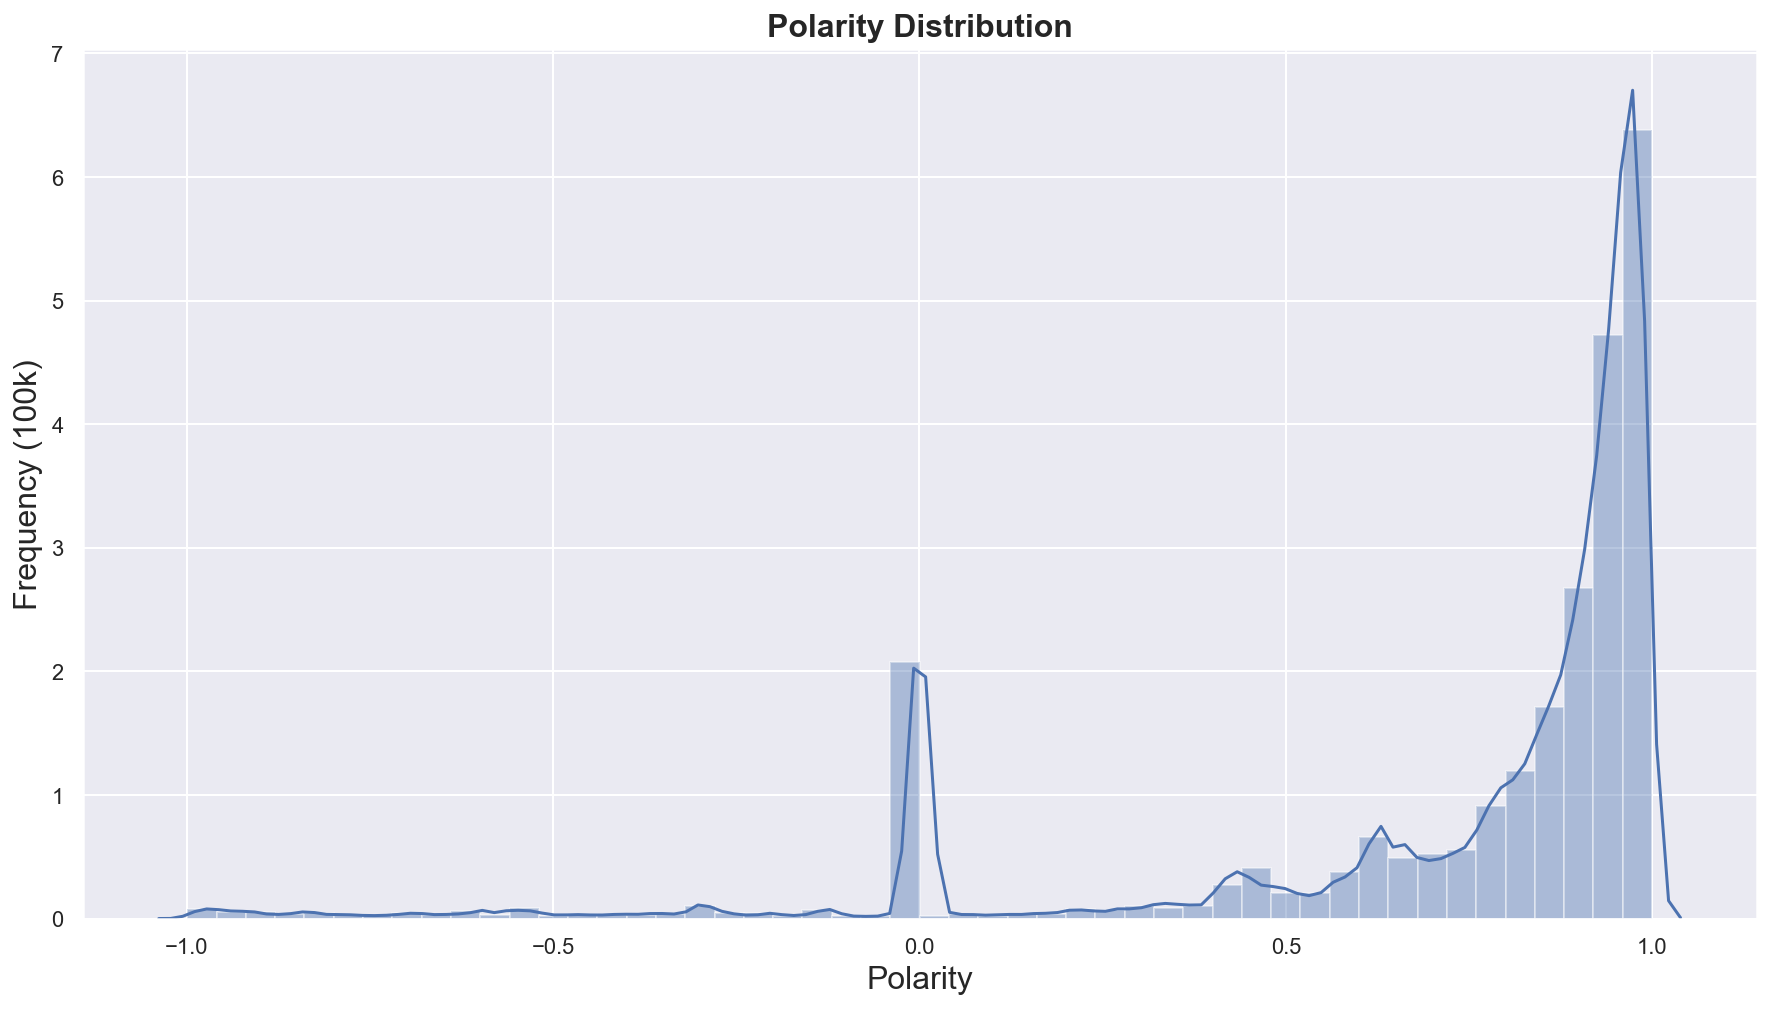

In [60]:
plt.figure(figsize=(15,8))
sns.distplot(reviews['polarity'])
plt.title('Polarity Distribution',fontsize=16,fontweight='bold')
plt.ylabel('Frequency (100k)',fontsize=16)
plt.xlabel('Polarity',fontsize=16);

In [61]:
# Top negative reviews
reviews[reviews.polarity <=-0.5].sort_values(by='polarity').head(10)

listing_id         id        date  reviewer_id reviewer_name                                           comments  polarity
1553900    14406693  249031046  2018-04-01     30817661          Anja  *** Kommunikation *** Die Kommunikation mit Da...   -0.9992
831460     19343700  426015020  2019-03-19     82172655        Maggie  My mother, brother, and I rented Shaun’s apart...   -0.9990
1683134    14398761  144051906  2017-04-14     56381129          Seda  Eine Freundin und ich sind für eine Woche nach...   -0.9989
1191380    11636784  340993341  2018-10-25    215163492        Simone  Die Unterkunft war toll.\nCheck-in war unprobl...   -0.9988
10725         24143  243906553  2018-03-17     95378214         Bruno  Wir waren leider etwas enttäuscht von der Wohn...   -0.9987
1439003    24679314  311087509  2018-08-20    196121480       Jessica  Wir haben 3 Nächte in der Unterkunft verbracht...   -0.9987
219603      2033866   80139898  2016-06-16      2987449       Joachim  Ich habe gemischte Gefühle was die Unterkunft ...   -0.9986
198155      1744216   48205597  2015-09-24     28771048          Alex  Der Schein trügt!\r\n\r\nAuf den Fotos sieht d...   -0.9985
1295815     7307682   99956436  2016-09-06     76706885     Dominique  Zuerst möchte ich sagen, dass wir Wei nicht pe...   -0.9985
950077     22749701  345754013  2018-11-06    120861242         Fatos  Wir sind 23 Uhr Nachts in der Wohnung angekomm...   -0.9984

Non-english reviews dominate the negative reviews. A Google Translate API can be called on the reviews, before reiterating through Vader to provide a more accurate review polarity score, for future model iterations.

In [62]:
# Top negative review
reviews.loc[1553900]['comments']

'*** Kommunikation *** Die Kommunikation mit Dan war großartig! Er hat immer sehr schnell geantwortet und war immer sehr bemüht uns unseren Aufenthalt so toll wie möglich zu gestalten. Wir haben ihn am letzten Tag persönlich getroffen und er wirkte sehr freundlich und zuvorkommend. *** Die Lage *** Wir waren für 6 Nächte in Dans Wohnung im East Village. Uns hat die Lage der Unterkunft ausgesprochen gut gefallen, da man mitten im Geschehen war und von dort sehr gut mit dem Bus (M14a) oder der U-Bahn (F oder L) überall schnell hin kam. Man war so zentral, dass man sogar kurz zurück konnte, um z.B. Einkäufe abzulegen. Falls man in der näheren Umgebung der Unterkunft essen möchte, dann gibt es unzählige gute Restaurants, Bars oder Cafes. Insbesondere am Wochenende (abends) ist es sehr lebhaft, aber dennoch nicht besonders laut in der Unterkunft, da diese zum Hinterhof hinaus geht und der Straßenlärm nicht zu hören ist. Die Lage ist also top! *** Die Wohnung *** Den Schlüssel für die Wohnun

In [63]:
# No of reviews with negative polarity < -.05
reviews[reviews.polarity < -0.5].count()

listing_id       39584
id               39584
date             39584
reviewer_id      39584
reviewer_name    39584
comments         39584
polarity         39584
dtype: int64

Negative reviews with polarity <-0.5 constitute < 3% of total reviews - it can be ignored for now.

In [64]:
# Top positive reviews
reviews[reviews.polarity <0.99999].sort_values(by='polarity',ascending=False).head(15)

listing_id         id        date  reviewer_id  reviewer_name                                           comments  polarity
1251460    12850911  348129593  2018-11-12      5454301          Barry  The Space: Absolutely stunning and gorgeous. T...    0.9998
171090      1294973   12394580  2014-05-01       689140           Adam  We stayed at Jeffrey's apartment for 2.5 weeks...    0.9996
639824     13762046  421436977  2019-03-09    140641443      Alexander  Han is a wonderful host! She made the stay all...    0.9996
1087632    29886141  479139253  2019-06-30      2371170         Lilian  I cannot recommend Sara and her place enough. ...    0.9996
1552139    13183836   81324182  2016-06-22     19487225          Bryce  Host: \r\nAnastasja was a fantastic host. Her ...    0.9996
1090867    30037932  483582636  2019-07-07     21118361           Paul  If you're driving to NYC then this is the plac...    0.9996
884912     21005576  470889142  2019-06-16    249953648        Joaquin  What i can say, i can't imagine having a bette...    0.9996
894505     21263728  334921386  2018-10-10     19981646           Alan  Had the greatest week of my life in NY, and th...    0.9996
1148641    34651960  469928020  2019-06-15       923843             Ms  CC's seems like a nice guy who's listing has p...    0.9996
707900     15720498  338864276  2018-10-20    215282269  Donna & Kenda  Where to begin?\n\nIf you are seeking the ulti...    0.9995
1088746    29937451  432660186  2019-04-04     75248952    Mandiforeva  Hiedi I can’t express how wonderful you are. C...    0.9995
701718     15531889  260637956  2018-05-04     18443902            Nea  Excellent accommodation! We were a party of 4 ...    0.9995
610155     13042051  107821471  2016-10-12     52022289          David  Jeff has a really nice place located in Willia...    0.9995
243574      2563611   11773938  2014-04-14      8901579           Maya  This apartment was awesome! Don't be deterred ...    0.9995
975541     23935141  348374455  2018-11-13     77020010      Christian  OVERALL STARS: 5. I do not know where to begin...    0.9995

In [65]:
# Top positive review
reviews.loc[1251460]['comments']

'The Space: Absolutely stunning and gorgeous. The bed is very comfortable. The high ceilings and tall windows allow lots of light in, but the drapes allow for a dark room for sleep. The area is quiet, and no real moise outside the windows from the city — pretty quiet for New York city, considering we stayed over a weekend Thursday to Monday! The bathtub in the bedroom is relaxing, and a wonderful spot to recharge from the bustle of the city. The bathroom is beautiful and rainfall shower head, plus directional shower head are great too. A little coffee maker in the room is there if you like to start your day that way before entering the kitchen.\n\nThe Area: Tribeca is amazing. Classy, quiet, a sense of charm and history. The most beautiful, upscale area of New York (I prefer it to the UES). Over our visit we easily walked everywhere we wanted to go in Tribeca and neighboring areas like the West Village, Soho (Frequently), and even the East Village, Little Italy and Chinatown. I went up

In [66]:
# Calculating polarity mean for each listing
polarity = reviews.groupby('listing_id')['polarity'].mean()
polarity = polarity.to_frame()

In [67]:
# Merge polairty into listings dataframe
listings = listings.merge(polarity,how='left', left_on = 'id', right_on='listing_id')

In [68]:
listings.polarity.fillna(0, inplace=True)

## Observation of Predicted Variable
[To Top](#Top)

In [69]:
listings.price.describe()

count    82183.000000
mean       158.747296
std        254.362834
min          0.000000
25%         69.000000
50%        110.000000
75%        184.000000
max      10000.000000
Name: price, dtype: float64

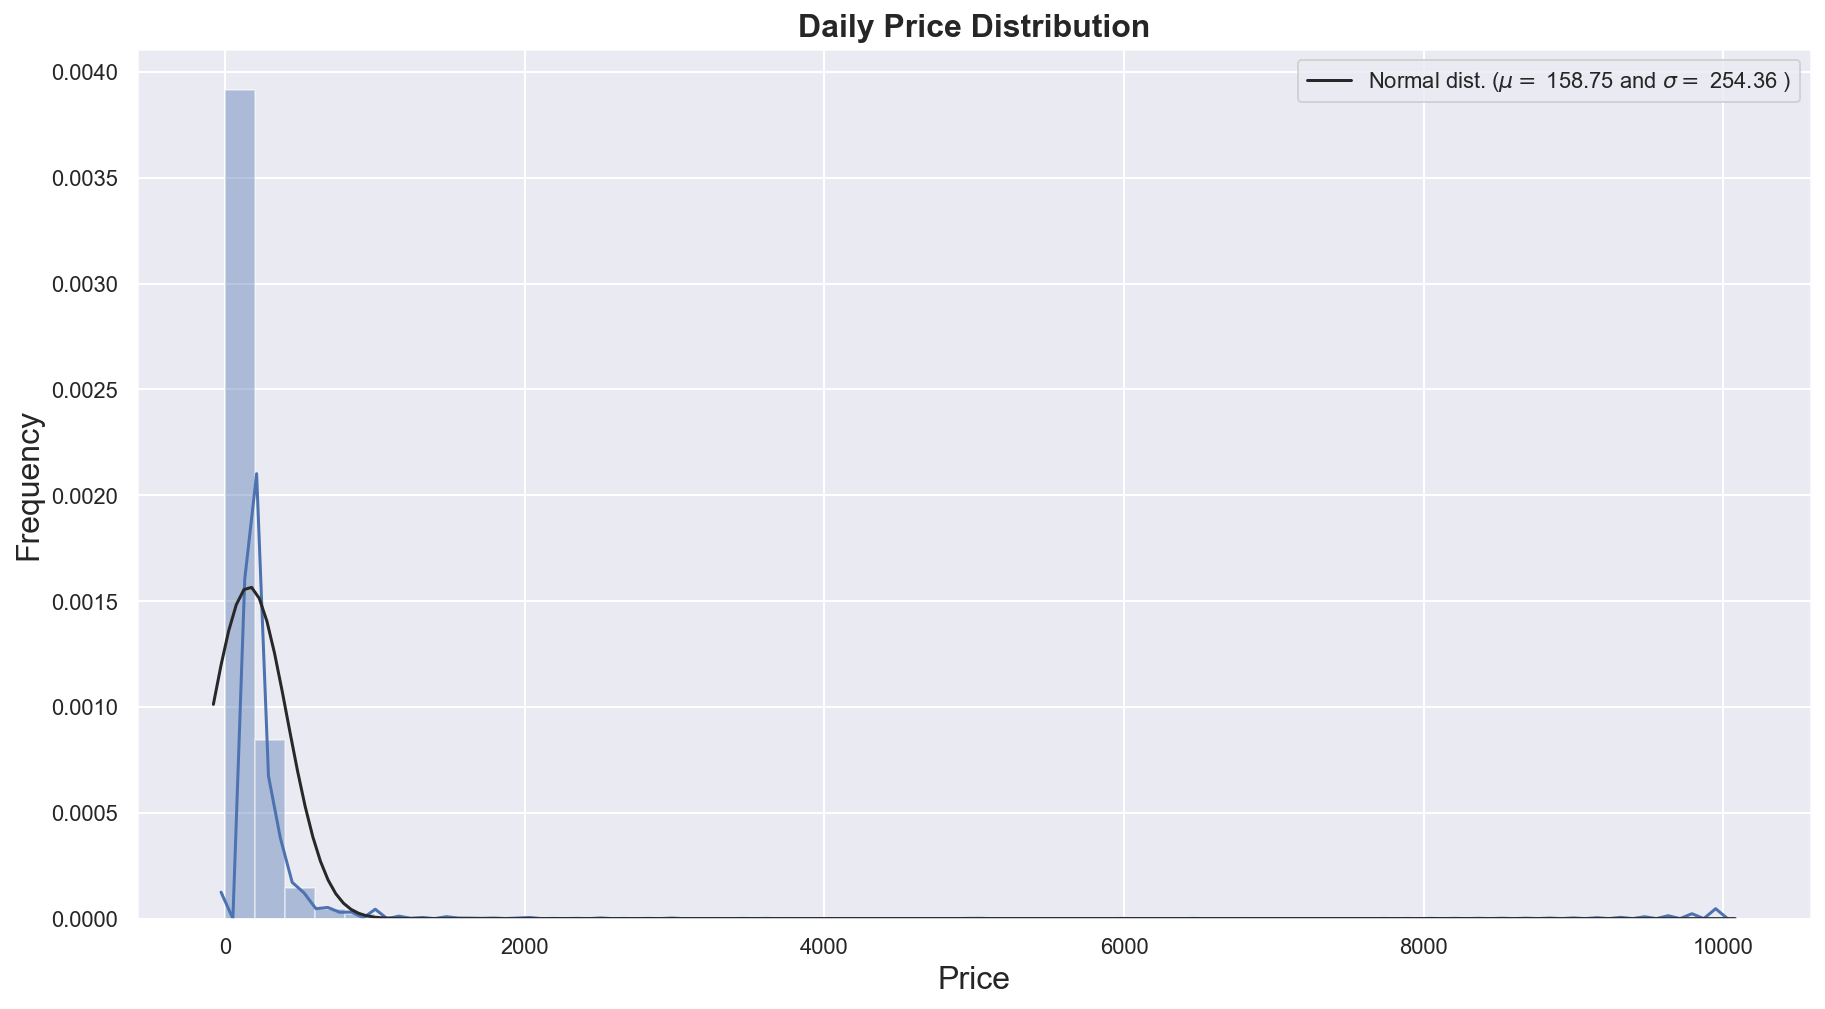

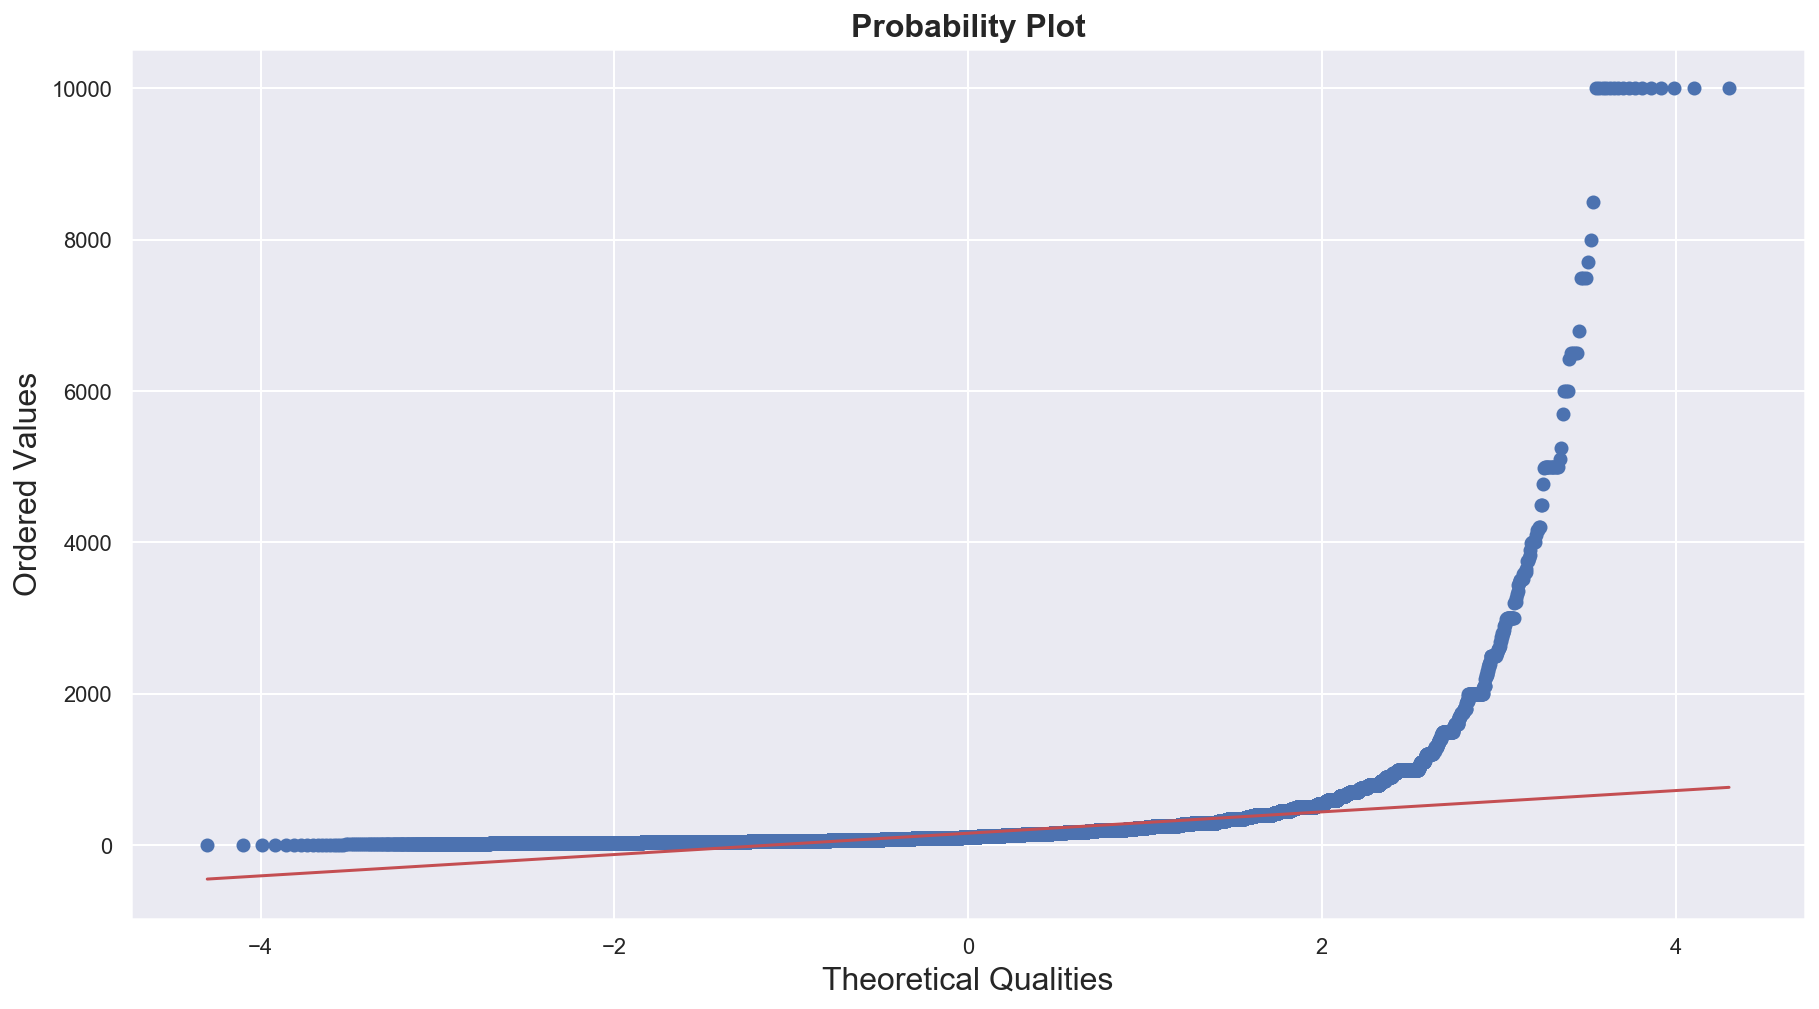

In [70]:
# Kernel Density Plot
plt.figure(figsize=(15,8))
sns.distplot(listings.price,fit=norm);
plt.title('Daily Price Distribution',fontsize=16,fontweight='bold')
plt.ylabel('Frequency',fontsize=16)
plt.xlabel('Price',fontsize=16);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(listings['price']);
# QQ-plot
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
fig = plt.figure(figsize=(15,8))
res = stats.probplot(listings.price, plot=plt)
plt.title('Probability Plot',fontsize=16,fontweight='bold');
plt.ylabel('Ordered Values',fontsize=16)
plt.xlabel('Theoretical Qualities',fontsize=16)
plt.show()

The price distribution is grossly right skewed, and has peakedness. Since linear regression models fits better on normally distributed data, and performs more "well-behaved", we should normalize the target variable by taking log(feature+1), after removing the small set of observations with daily price >1,000 (~200 listings). 

In [71]:
# Get names of indexes for which price column is less than 1,000
indexNames = listings[listings['price'] >= 1000].index
 
# Delete these row indexes from dataFrame
listings.drop(indexNames, axis=0, inplace=True)

In [72]:
#log transform the target:
listings["price"] = np.log1p(listings["price"])

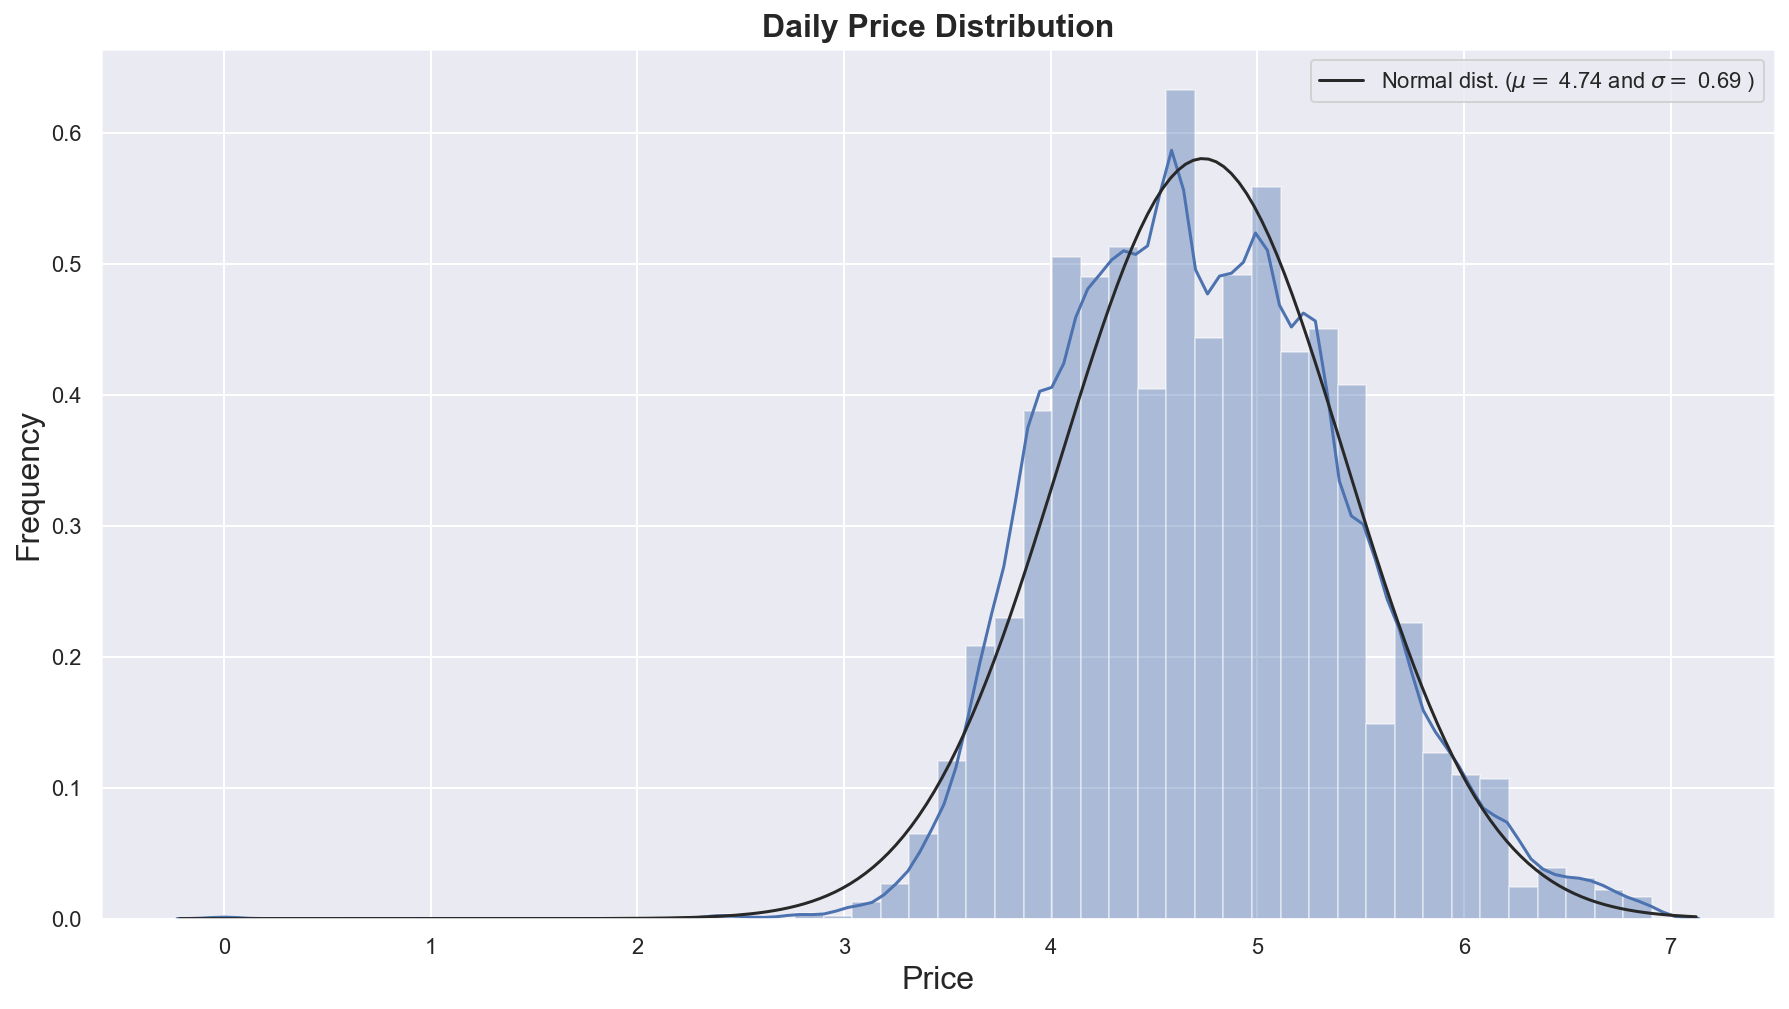

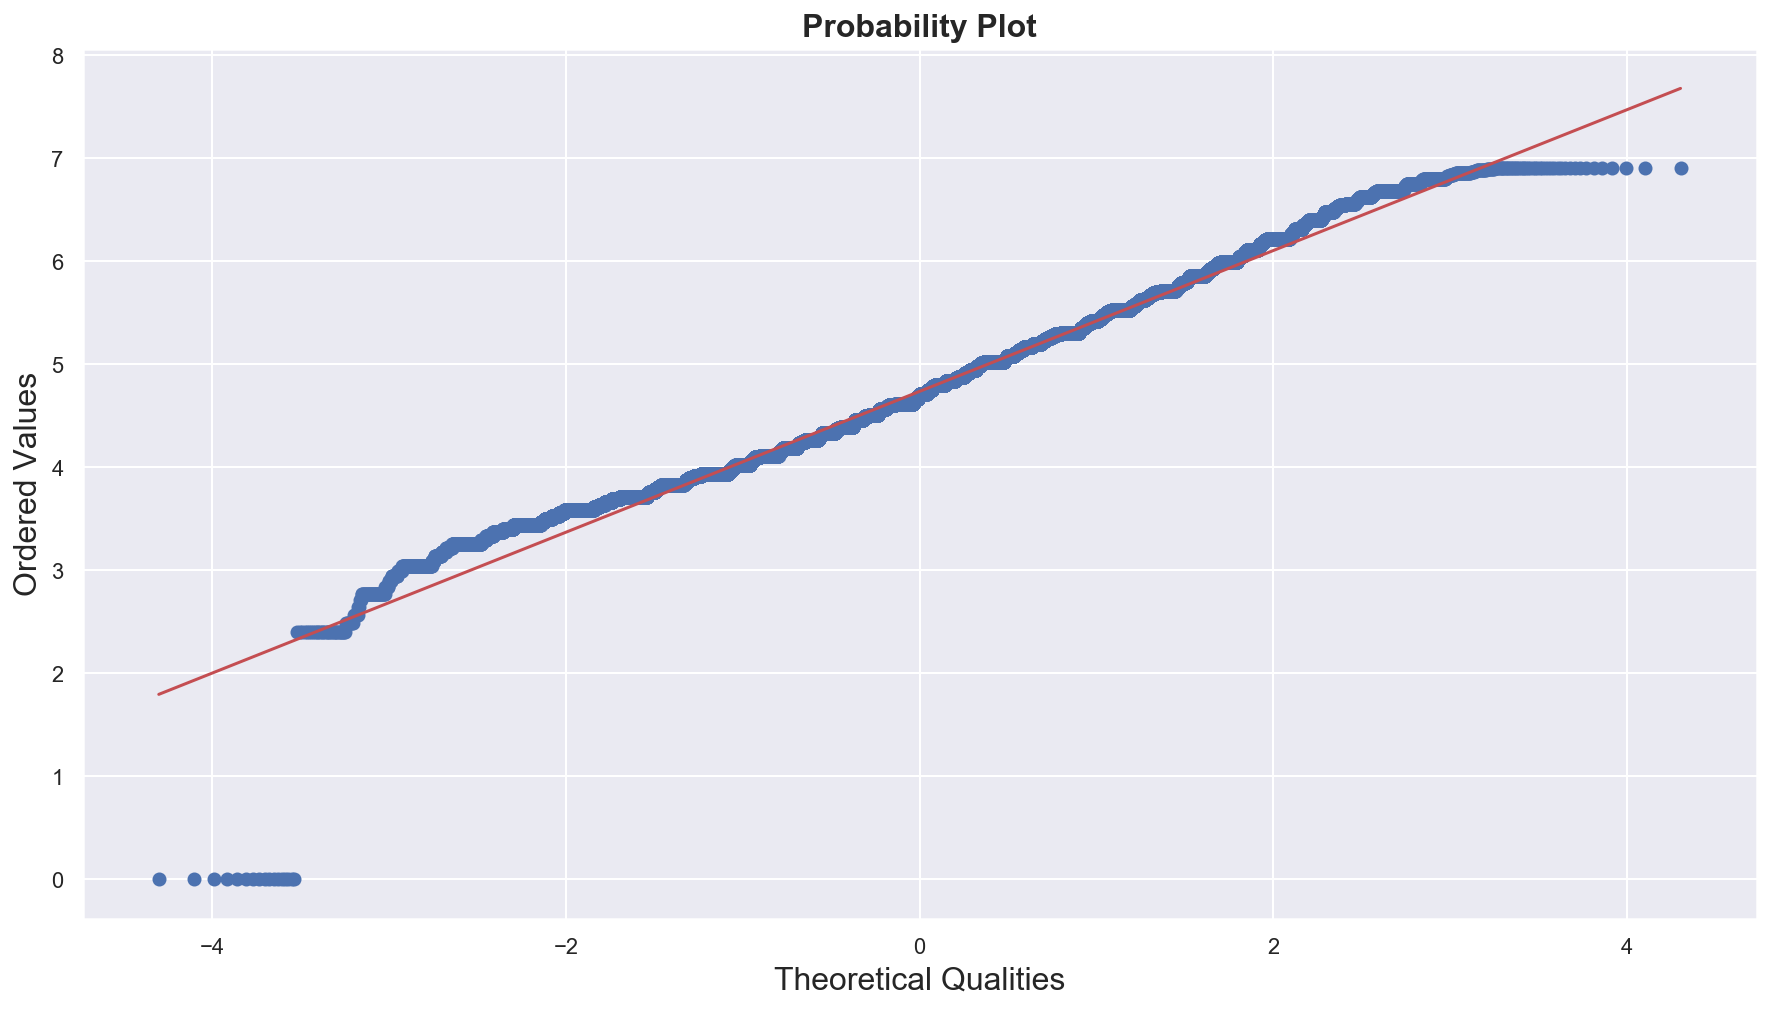

In [73]:
# Kernel Density Plot
plt.figure(figsize=(15,8))
sns.distplot(listings.price,fit=norm);
plt.title('Daily Price Distribution',fontsize=16,fontweight='bold')
plt.ylabel('Frequency',fontsize=16)
plt.xlabel('Price',fontsize=16);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(listings['price']);
# QQ-plot
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
fig = plt.figure(figsize=(15,8))
res = stats.probplot(listings.price, plot=plt)
plt.title('Probability Plot',fontsize=16,fontweight='bold');
plt.ylabel('Ordered Values',fontsize=16)
plt.xlabel('Theoretical Qualities',fontsize=16)
plt.show()

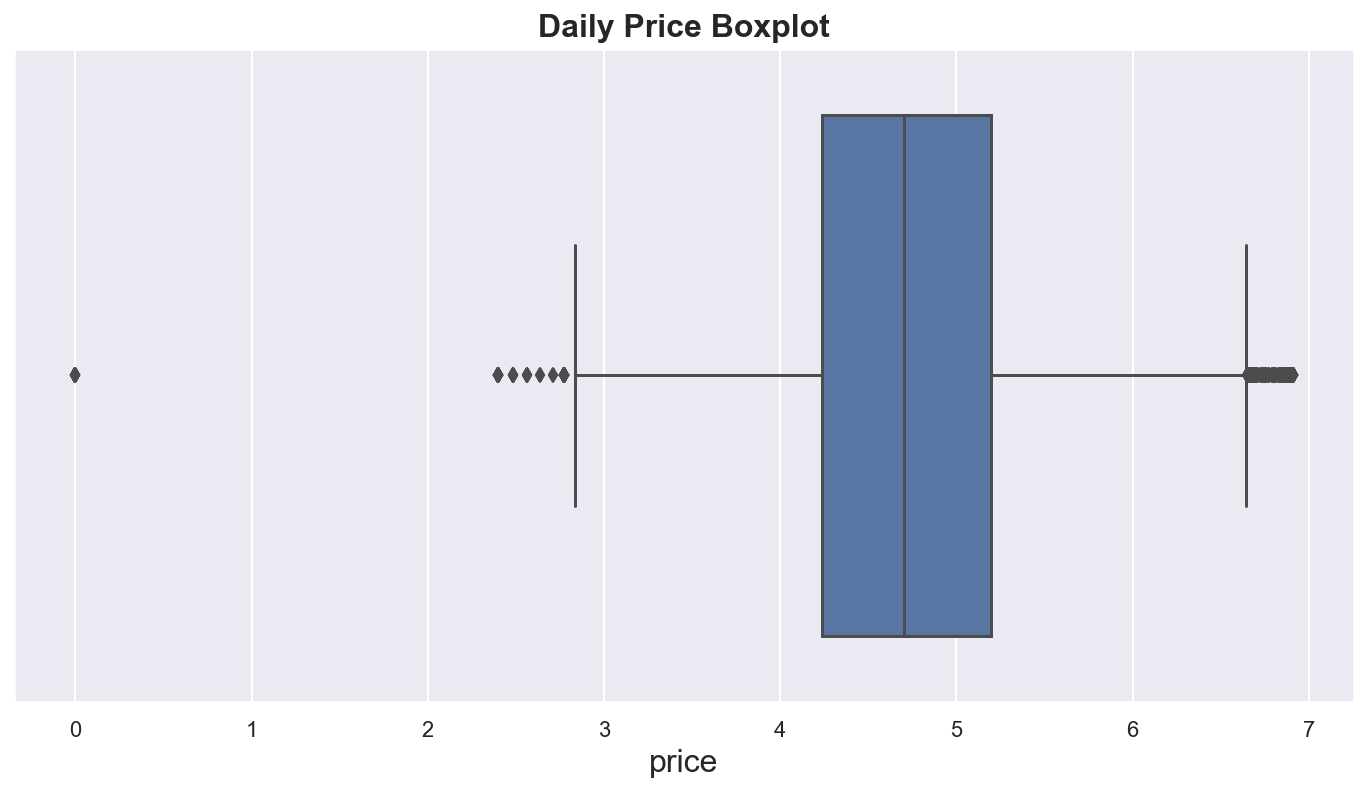

In [74]:
plt.figure(figsize=(12,6))
plt.title('Daily Price Boxplot',fontsize=16,fontweight='bold');
plt.xlabel('Daily Price',fontsize=16)
sns.boxplot(listings['price']);

While the price distribution appears more normally distributed, the boxplot suggests there are extreme outliers - to remove

In [75]:
#Removal of anomalies in price where deviation is >4 sigma
listings.drop(listings[listings['price']<2].index,inplace=True)

## Exploratory Data Analysis
[To Top](#Top)



Visualization of listings for daily prices <$700


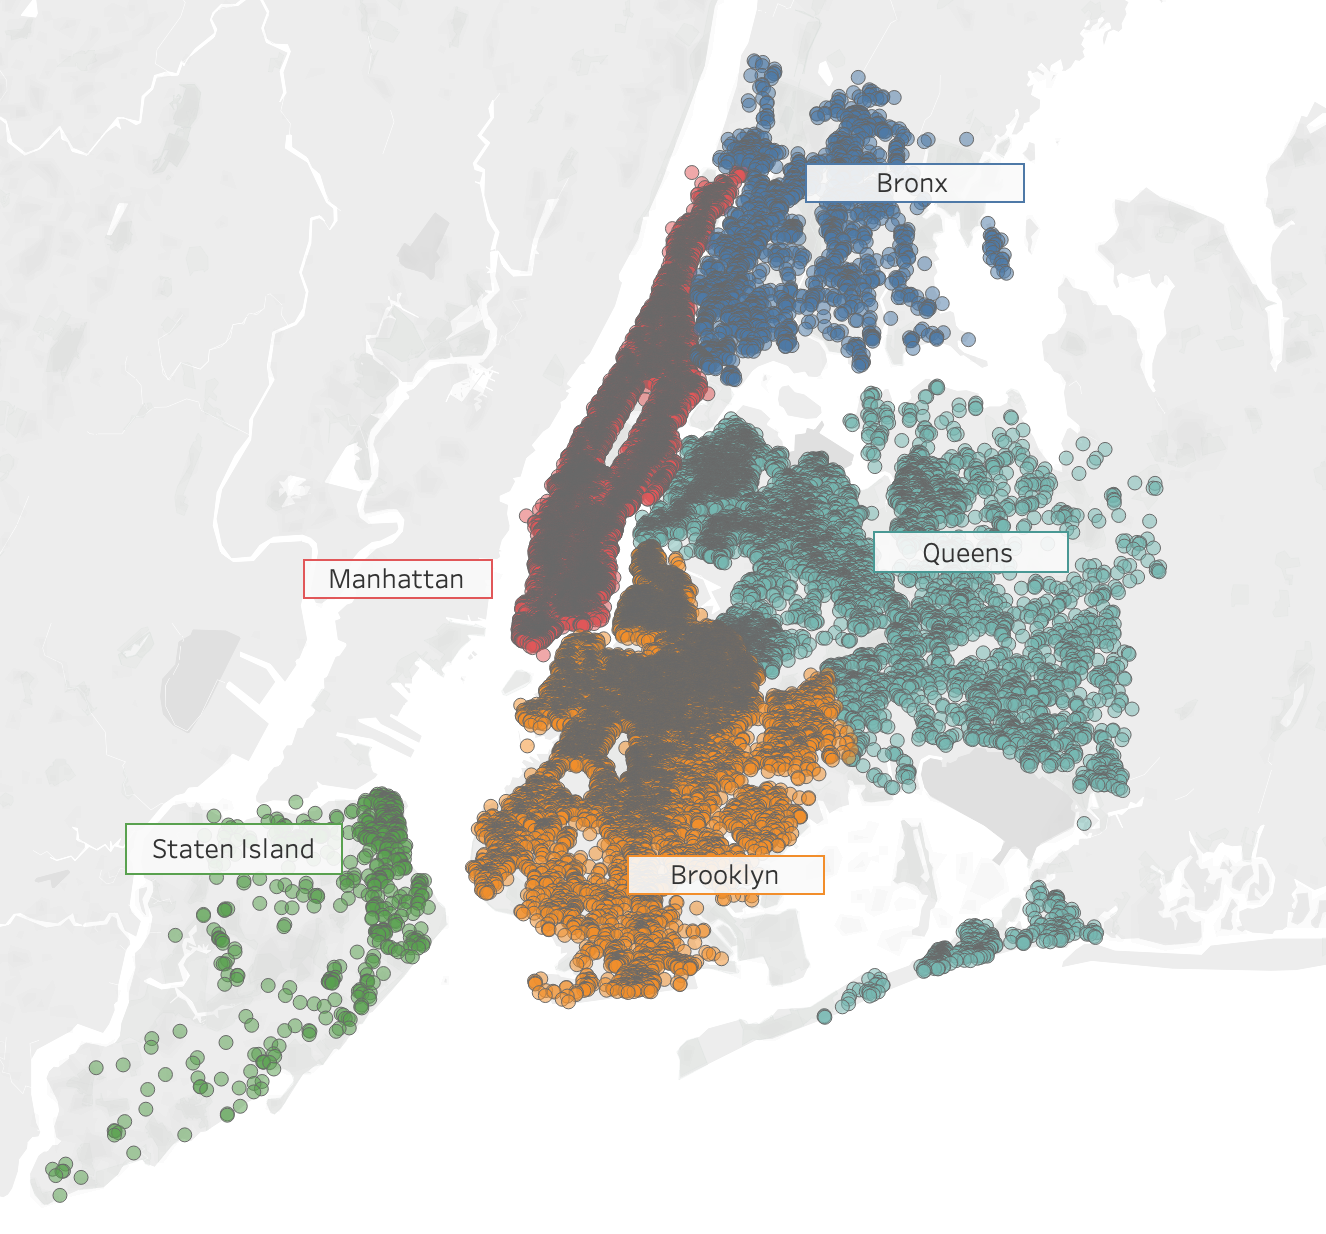

In [76]:
print('\n')
print('Visualization of listings for daily prices <$700')
PATH = "/Users/KeithTan/Desktop/Capstone/Asset/"
Image(filename = PATH + "Above 700.png", width=600, height=600)



Visualization of listings for daily prices >= $700


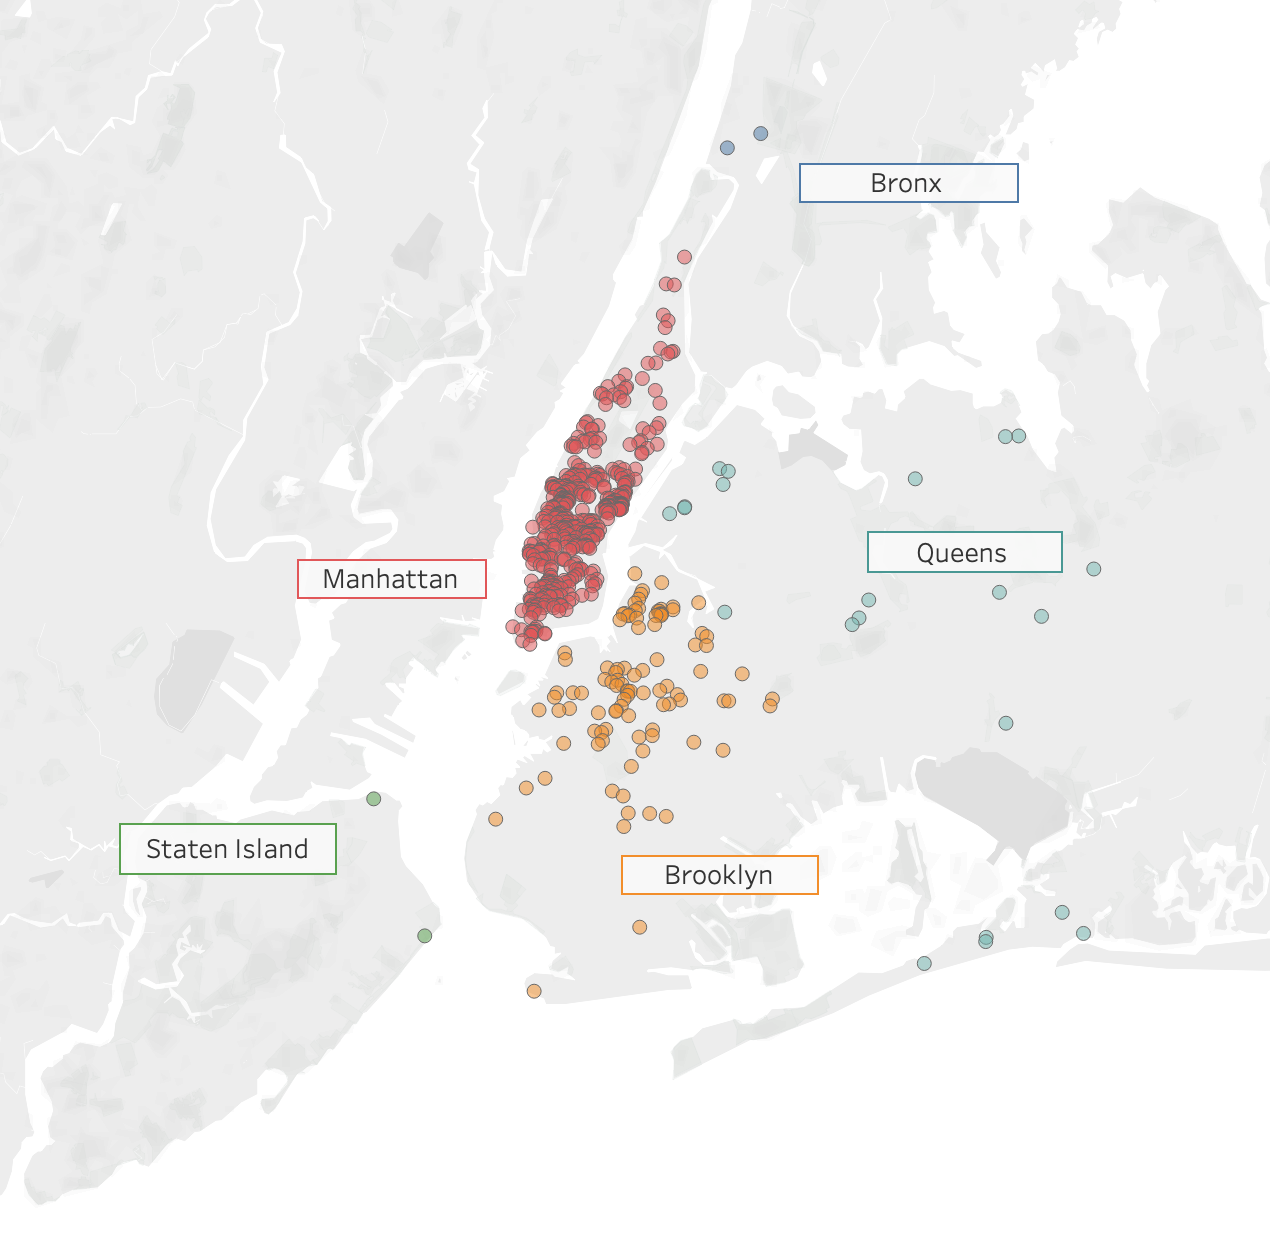

In [77]:
print('\n')
print('Visualization of listings for daily prices >= $700')
PATH = "/Users/KeithTan/Desktop/Capstone/Asset/"
Image(filename = PATH + "Under 700.png", width=600, height=600)

### Reviews Analysis

In [78]:
# Function was established to clean, tokenize and lemmatize the words.
def text_to_words(text):
   # Remove non-letters. Numbers are contextual and will not be very relevant in this case.
    letters_only = re.sub("[^a-zA-Z]", " ", str(text))
   # Converts string to lower text and split by space
    words = letters_only.lower().split()
   # Convert the stop words to a set. We used the ntlk stop words instead of the vectorizer stop words as the list is more comprehensive.
    stops = set(stopwords.words('english'))
   # Remove stop words.
    meaningful_words = [w for w in words if not w in stops]
   # Lemmatize the words and join the words back into one string separated by space, and return the result.
    lemmatizer = WordNetLemmatizer()
    tokens_lem = [lemmatizer.lemmatize(i) for i in meaningful_words]
    return(" ".join(tokens_lem))

In [79]:
# Function was established to create a word cloud for visualization
def word_cloud(cleaned,subreddit,color):
    text = str(cleaned)
    
    # Create and generate a word cloud image:
    wordcloud = WordCloud(width = 1400, height = 1000, background_color="white", colormap=color).generate(text)
    # Display the generated image:
    plt.figure(figsize = (14, 14), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Word cloud for {}'.format(subreddit),fontweight='bold', fontsize = 25)
    plt.axis("off")
    plt.show()

In [80]:
reviews_pos = reviews[reviews['polarity']> 0.5]
reviews_neg = reviews[reviews['polarity'] < -0.5]

In [81]:
# Takes approx 6 mins to complete
review_pos_list = []
review_neg_list = []

for text in reviews_pos.comments:
    review_pos_list.append(text_to_words(text))
    
for text in reviews_neg.comments:
    review_neg_list.append(text_to_words(text))

In [82]:
# Cleaned words in positive review are split into its individual strings
review_split = [i.split() for i in review_pos_list]
flat_list_review = [item for sublist in review_split for item in sublist]

# List of cleaned strings are placed into a dataframe and sorted by its count value
df_pos = pd.DataFrame({'Word': list(Counter(flat_list_review).keys()), 'Count': list(Counter(flat_list_review).values())})
df_pos.sort_values(by=['Count'],ascending=False).head(15)

Word   Count
81         great  943739
24         place  876015
21          stay  684779
49     apartment  601407
25      location  485734
44         clean  477795
4           host  464254
75          nice  359659
95         would  345808
51          room  320956
102            u  307622
145       subway  294425
221         time  276544
74   comfortable  275089
192    recommend  272172

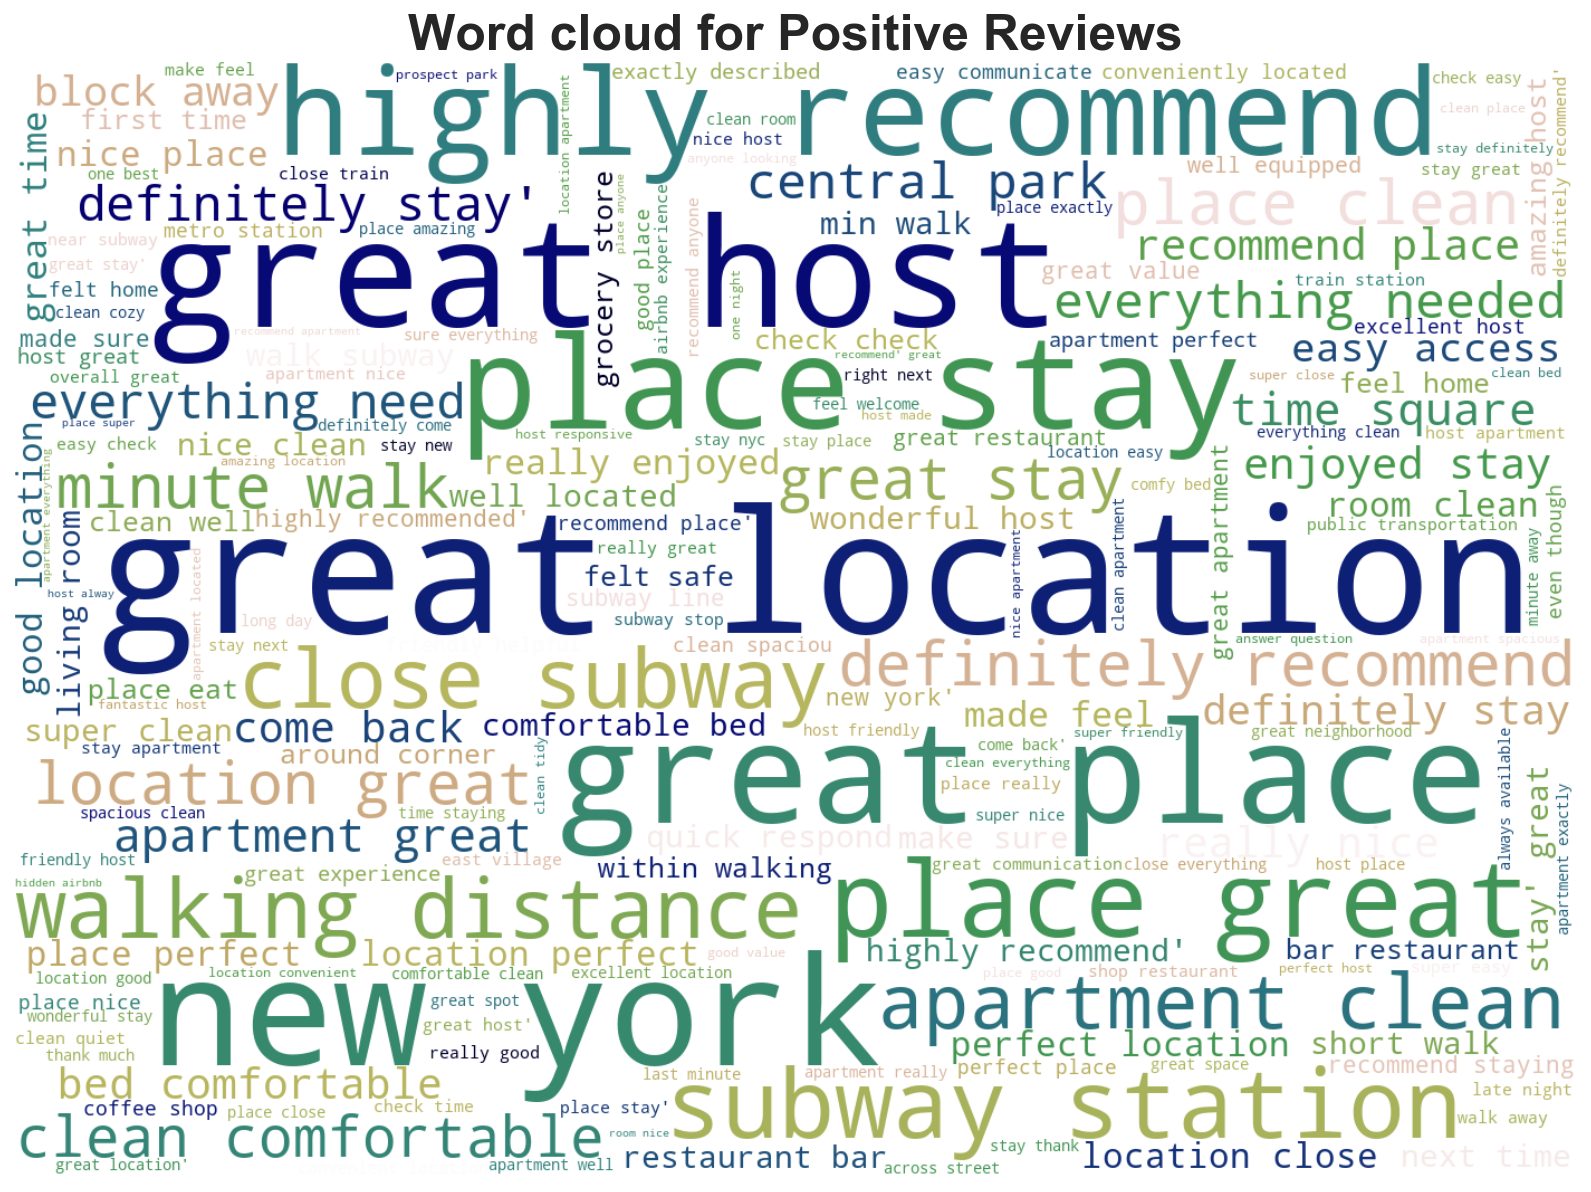

In [83]:
word_cloud(review_pos_list,'Positive Reviews',"gist_earth")

In [84]:
# Cleaned words in positive review are split into its individual strings
review_split = [i.split() for i in review_neg_list]
flat_list_review = [item for sublist in review_split for item in sublist]

# List of cleaned strings are placed into a dataframe and sorted by its count value
df_neg = pd.DataFrame({'Word': list(Counter(flat_list_review).keys()), 'Count': list(Counter(flat_list_review).values())})
df_neg.sort_values(by=['Count'],ascending=False).head(15)

Word  Count
41     de  45329
217   und  44601
0      la  40191
5       e  39029
220   die  36036
222   ist  25362
2       n  25209
37     en  25209
8      un  24837
31    que  24563
48     el  22810
254  sehr  22163
284   der  19804
215   war  18956
88     da  18262

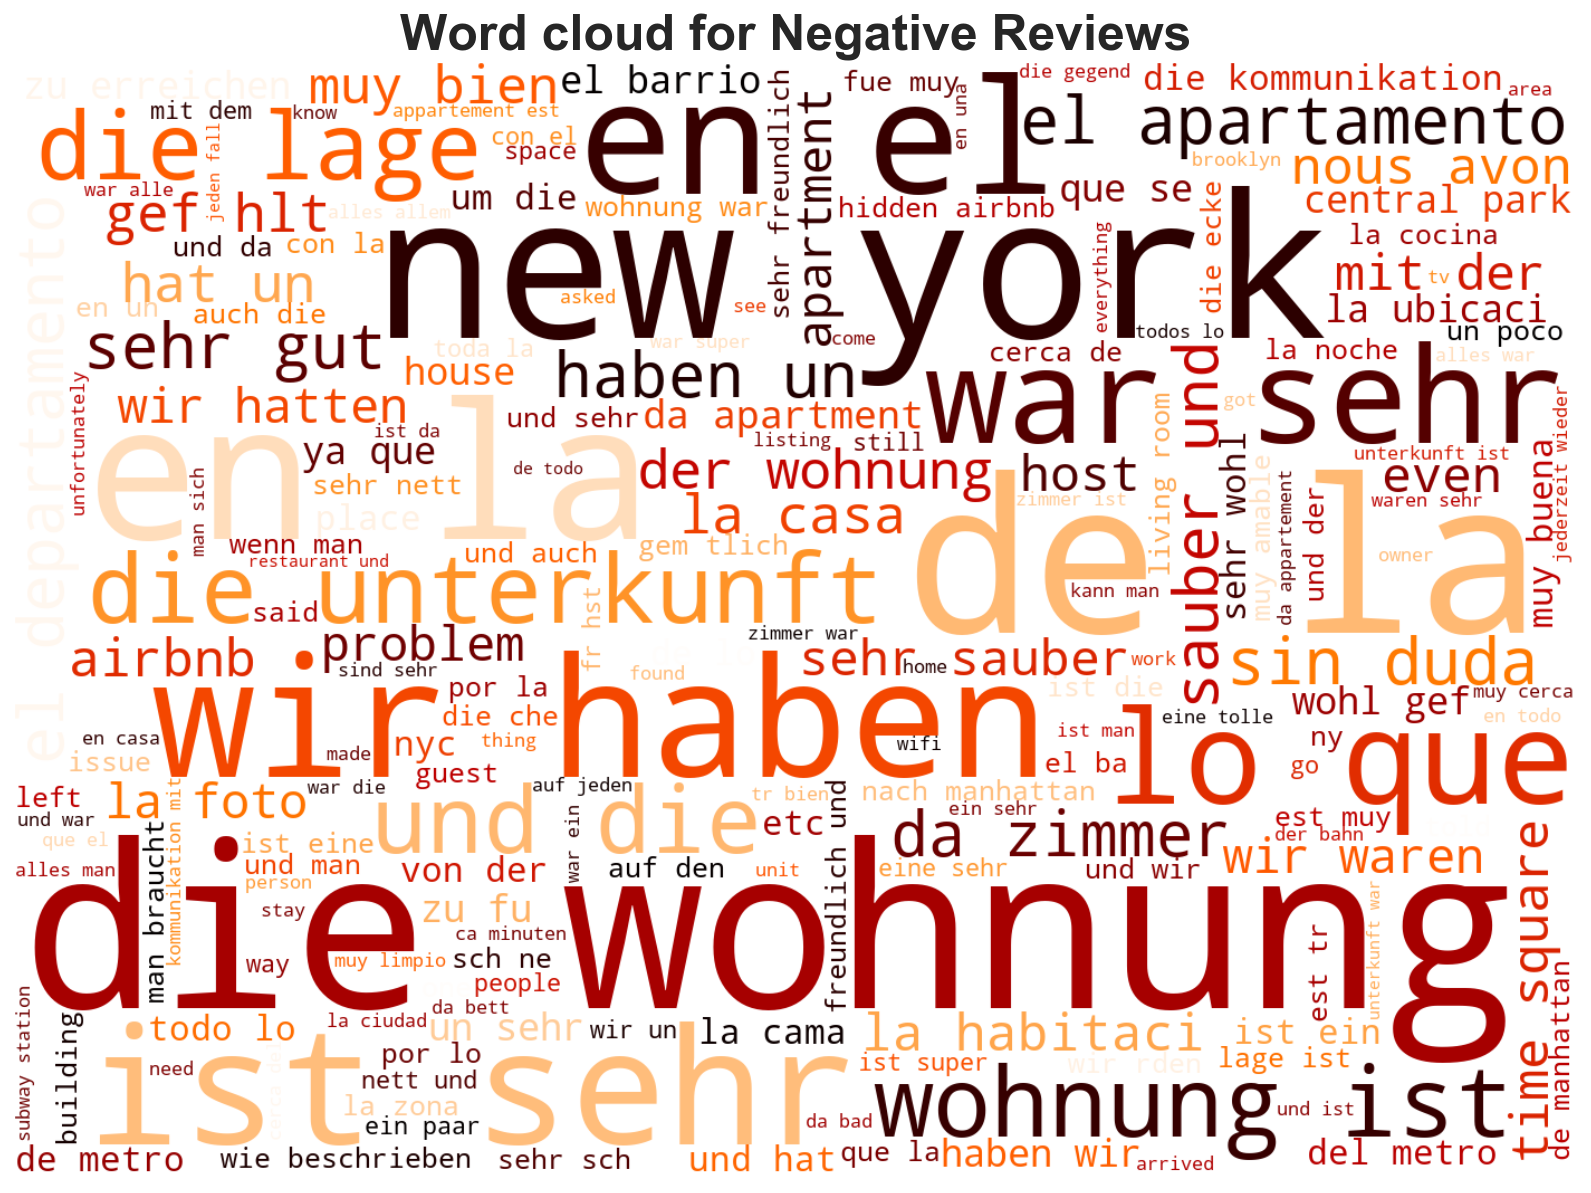

In [85]:
word_cloud(review_neg_list,'Negative Reviews','gist_heat')

Text(0.5, 0, 'Polarity')

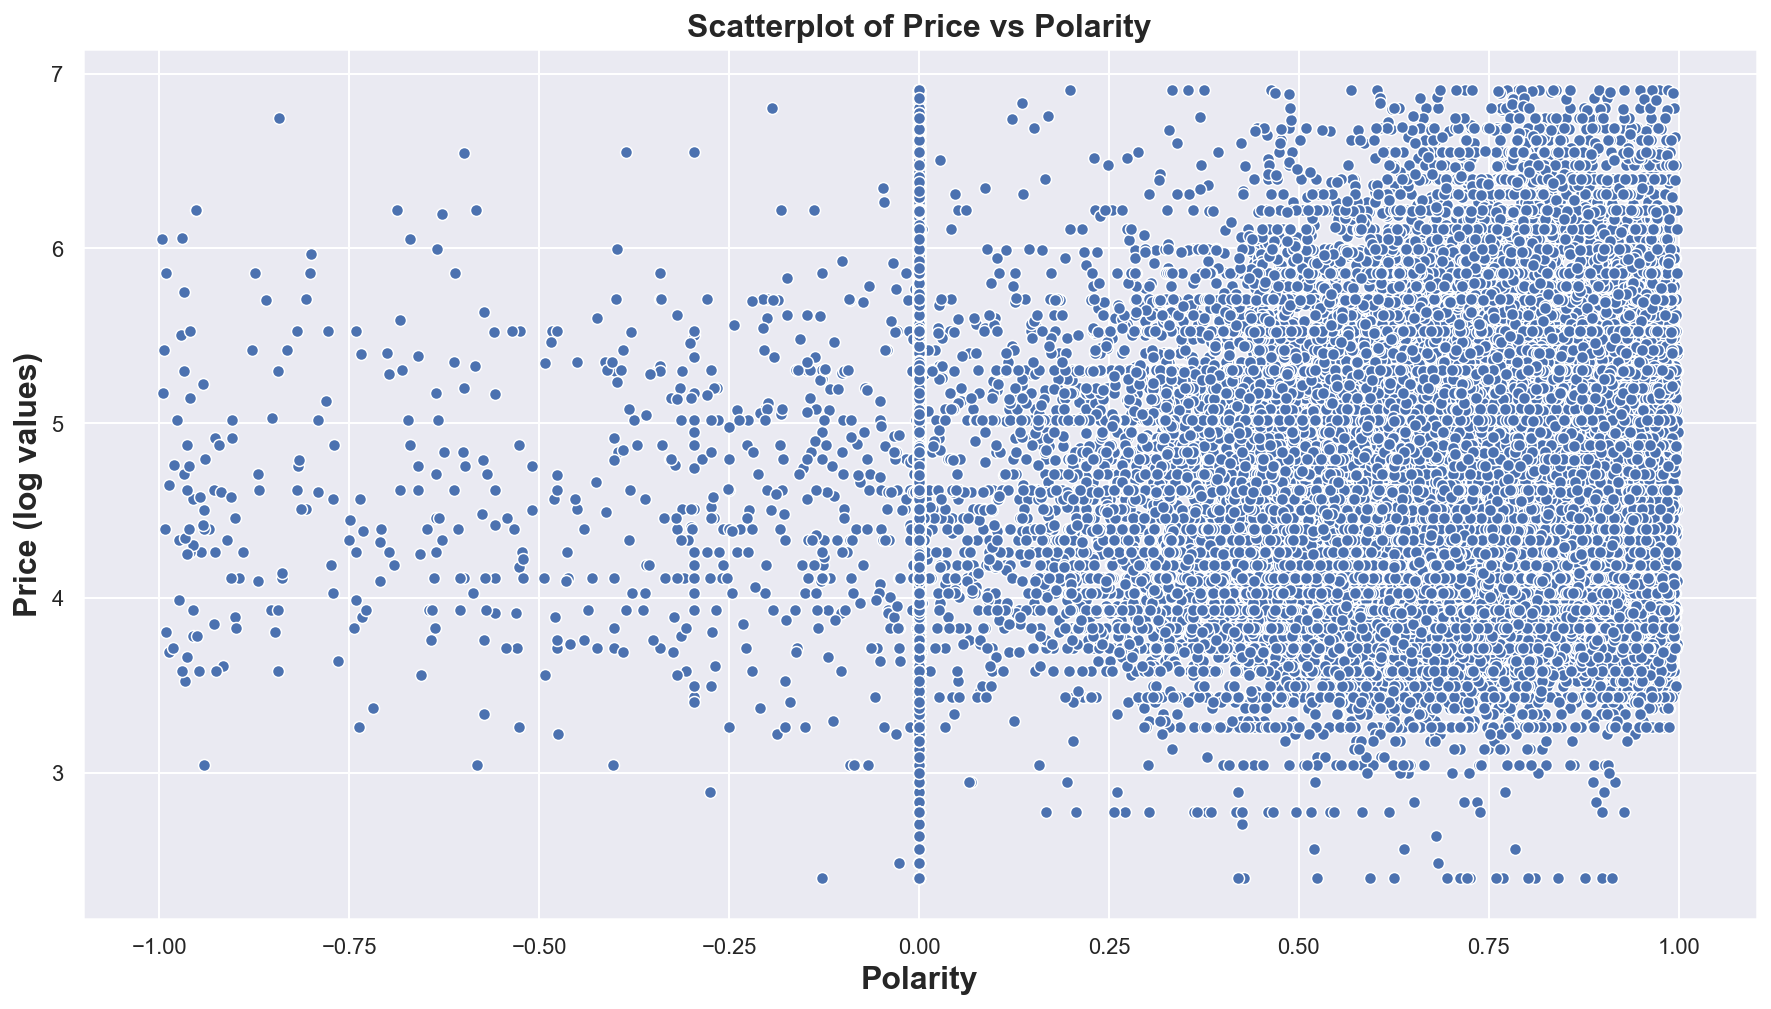

In [86]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='polarity',y='price',data=listings)
plt.title('Scatterplot of Price vs Polarity',fontsize=16,fontweight='bold')
plt.ylabel('Price (log values)',fontsize=16,fontweight='bold')
plt.xlabel('Polarity',fontsize=16,fontweight='bold')

### Feature Visualization

In [87]:
# Removal of text based columns
listings.drop(['id','name','summary','space','description','experiences_offered','neighborhood_overview','transit',
               'access','interaction','house_rules','cancellation_policy'],axis=1,inplace=True)

In [88]:
corrmat = listings.corr()
columns = abs(corrmat['price']).sort_values(ascending=False)
columns.head(10)

price                           1.000000
room_type                       0.643400
accommodates                    0.556946
neighbourhood_cleansed          0.515439
cleaning_fee                    0.483783
beds                            0.399030
city                            0.376573
dist_to_center                  0.352017
neighbourhood_group_cleansed    0.344174
bedrooms                        0.338468
Name: price, dtype: float64

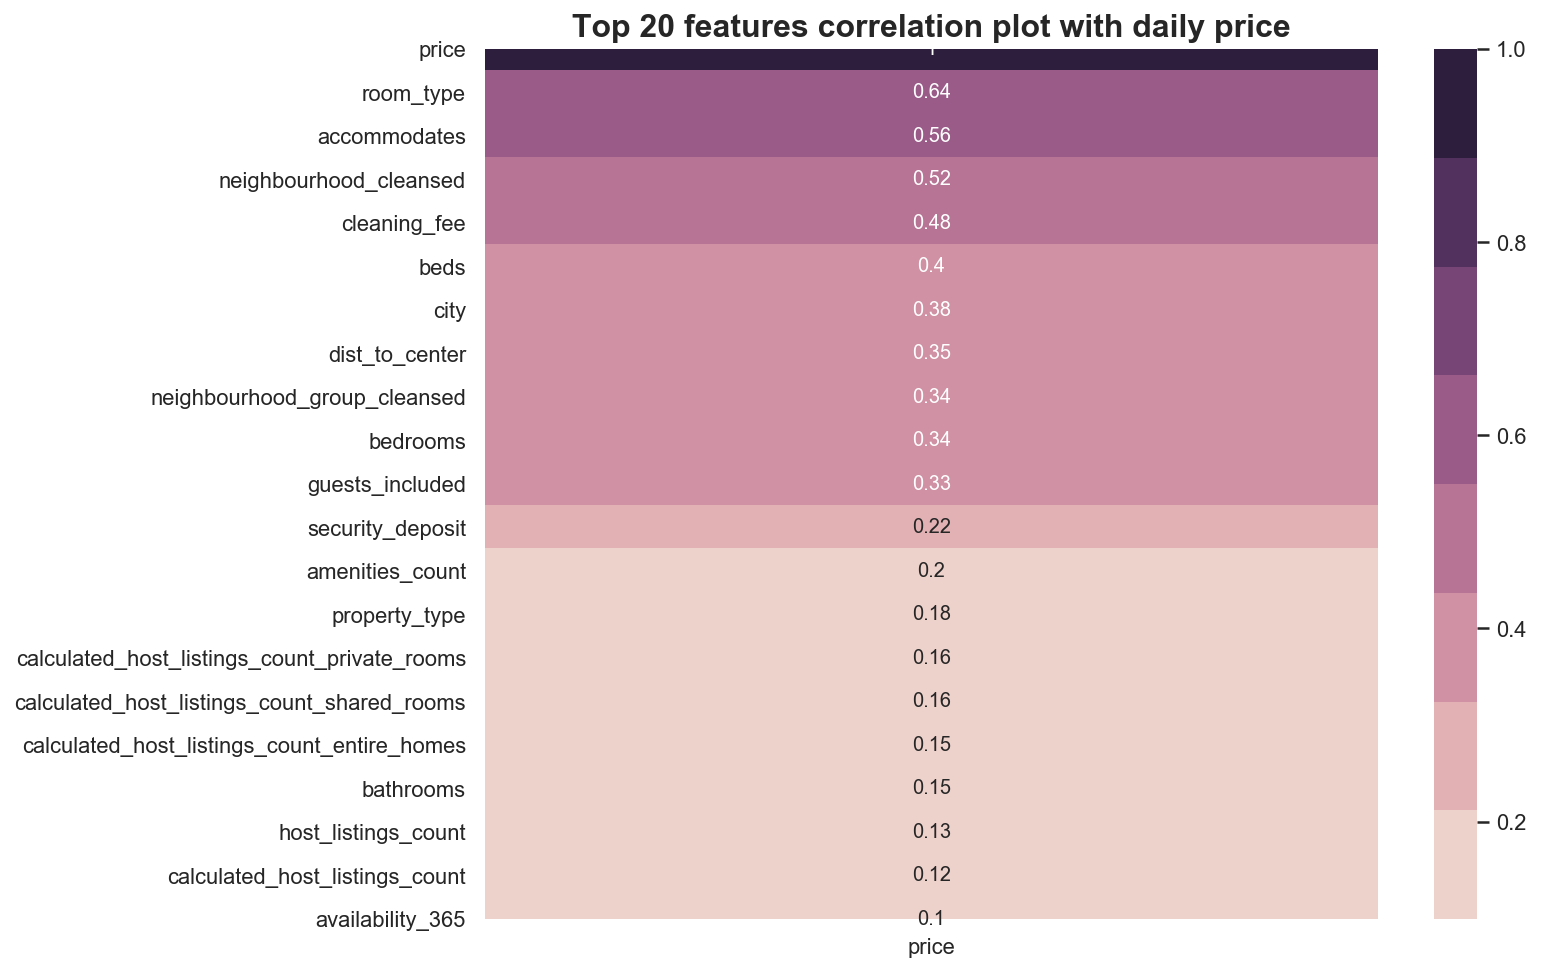

In [89]:
plt.figure(figsize=(10,8))
plt.title('Top 20 features correlation plot with daily price',fontsize=16,fontweight='bold');
sns.heatmap(pd.DataFrame(columns.head(21)),annot=True,cmap=sns.cubehelix_palette(8));

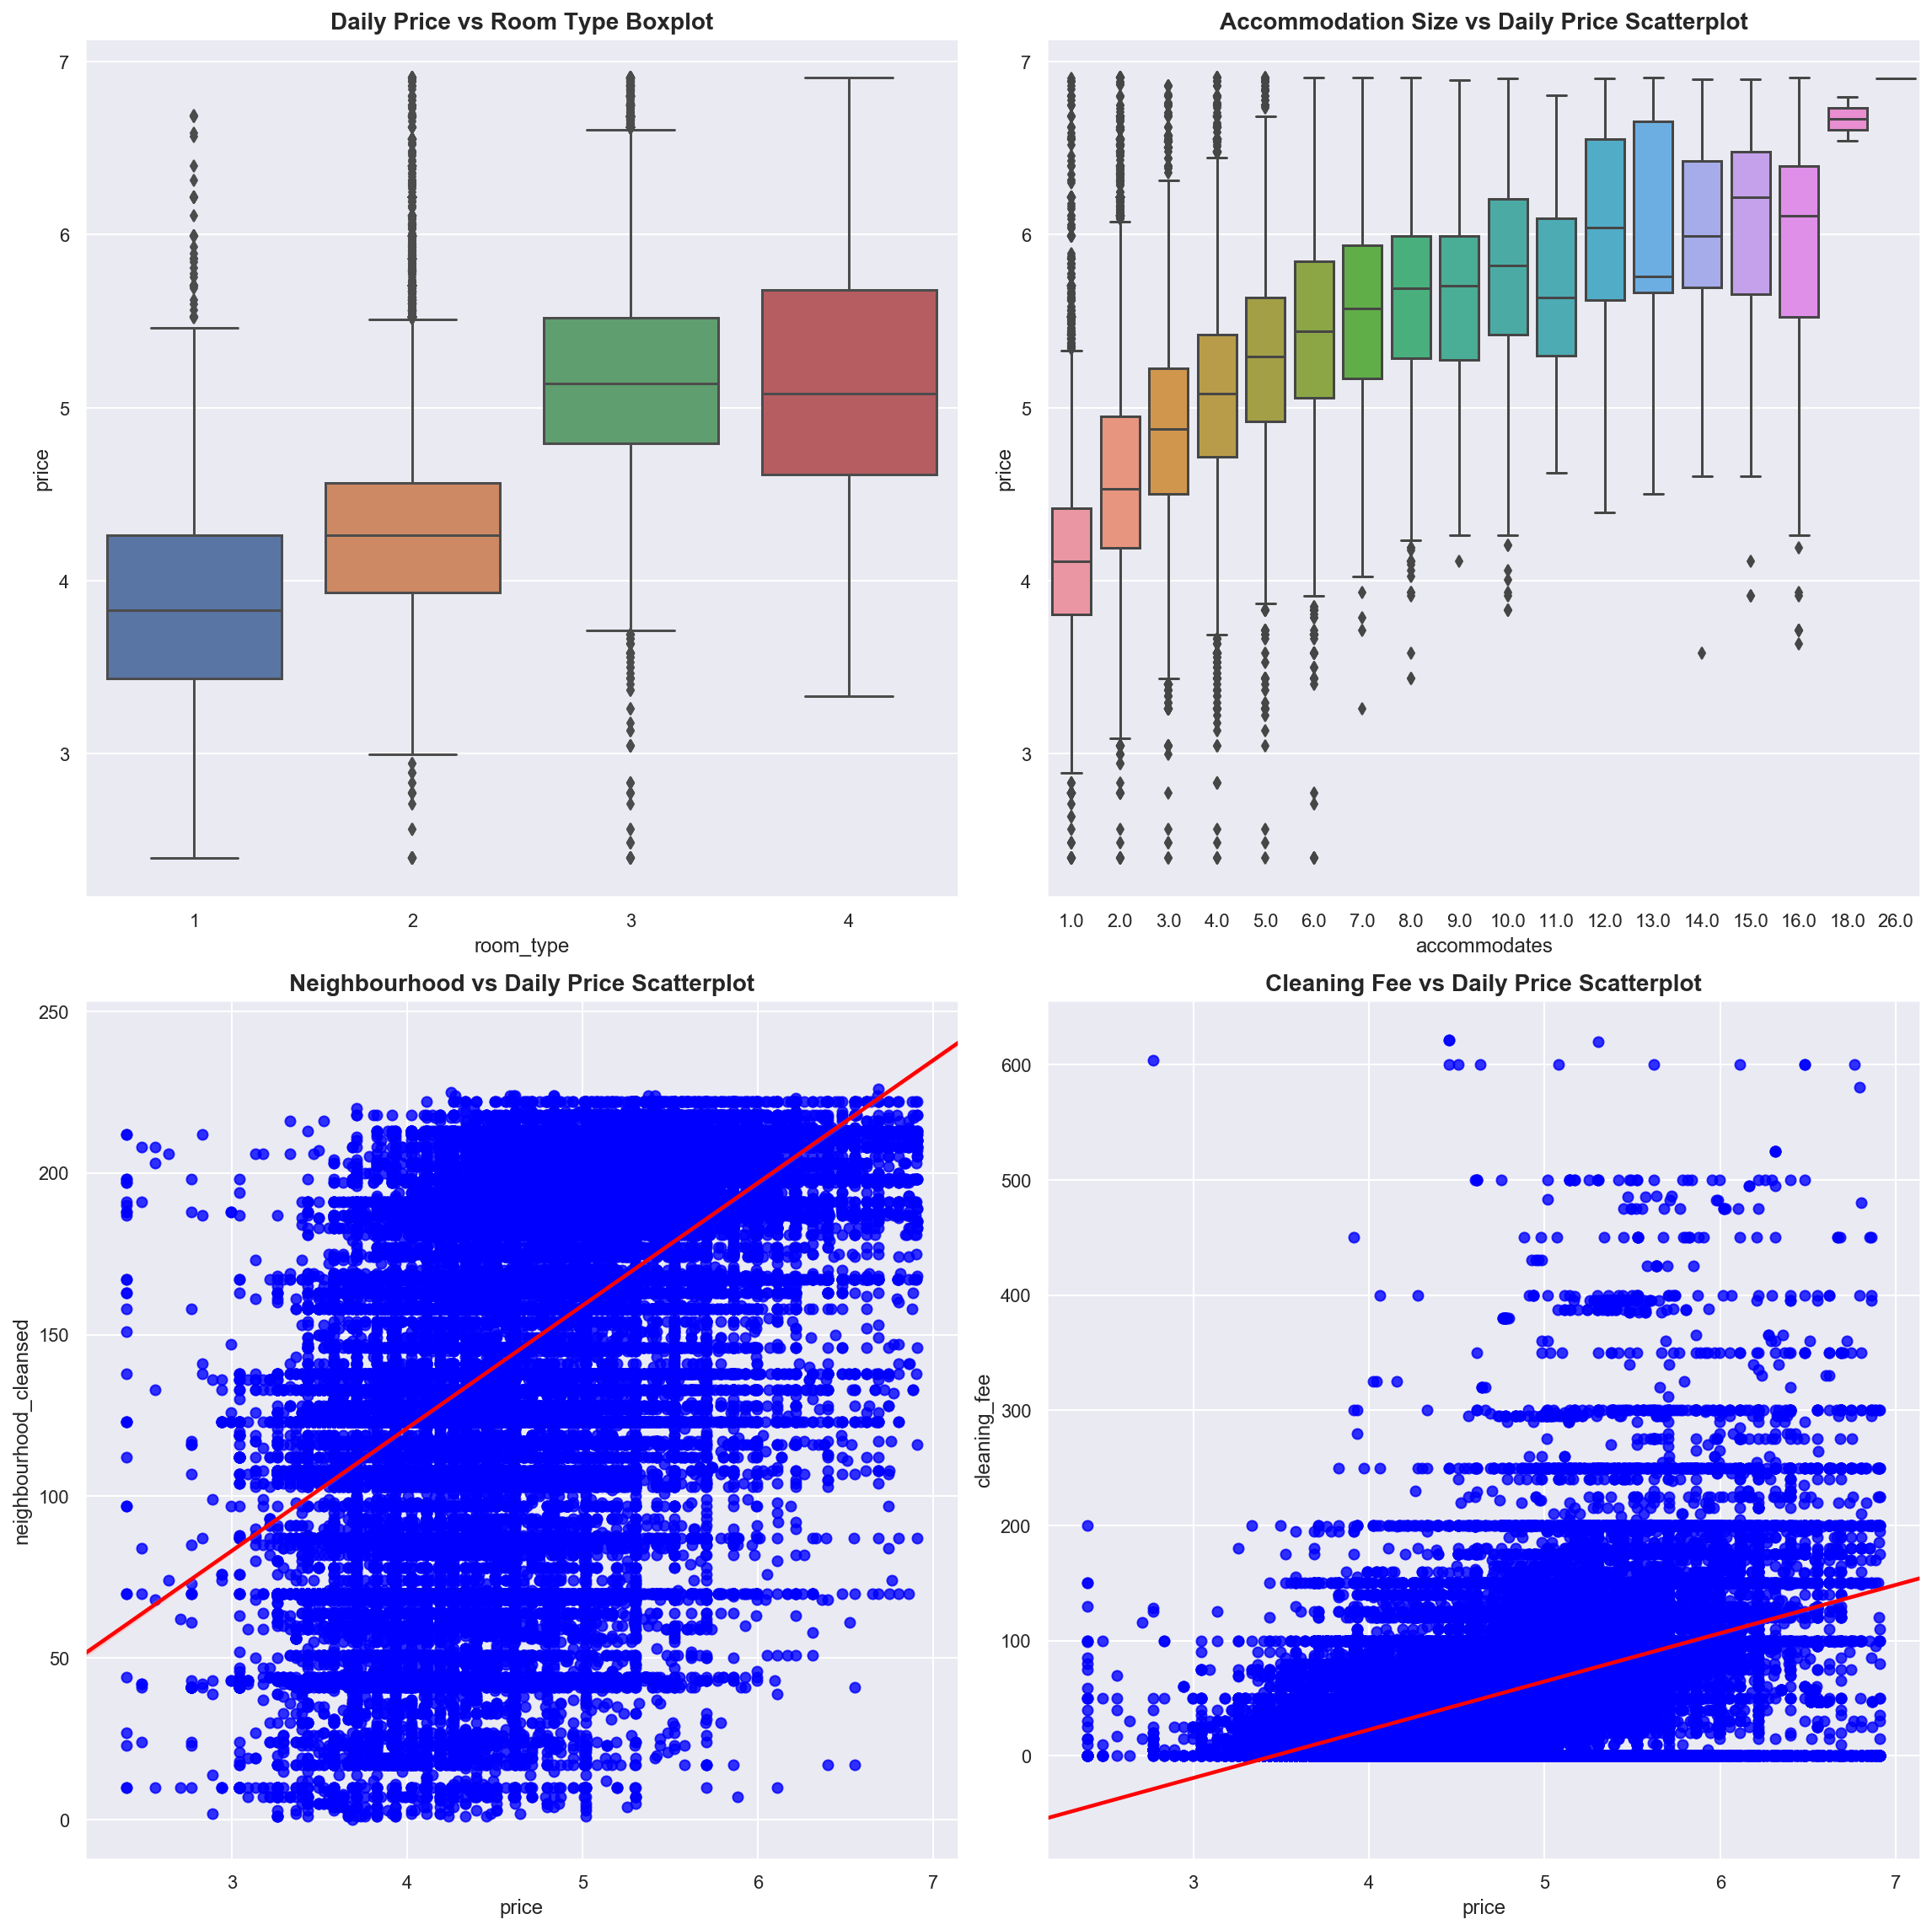

In [90]:
#Subplot to investigate deeper into top 4 features, and its relation with price
fig, axes = plt.subplots(2, 2,figsize=(16,16))

#Boxplot between OverallQual and SalesPrice
axes[0][0].set_ylabel('Daily Price')
axes[0][0].set_xlabel('Room Type')
axes[0][0].set_title('Daily Price vs Room Type Boxplot',fontweight='bold',size=14)
fig = sns.boxplot(x='room_type', y="price",ax=axes[0][0], data=listings)

#Scatterplot between GrLivArea and SalesPrice
axes[0][1].set_ylabel('Accomodates')
axes[0][1].set_xlabel('Daily Price')
axes[0][1].set_title('Accommodation Size vs Daily Price Scatterplot',fontweight='bold',size=14)
fig = sns.boxplot(x='accommodates', y="price",ax=axes[0][1], data=listings)

#Scatterplot between GarageArea and SalesPrice
axes[1][0].set_ylabel('Neighbourhood')
axes[1][0].set_xlabel('Daily Price')
axes[1][0].set_title('Neighbourhood vs Daily Price Scatterplot',fontweight='bold',size=14)
scat = sns.regplot(x="price", y='neighbourhood_cleansed', ax=axes[1][0], data=listings,  scatter_kws={"color": "blue"}, line_kws={"color": "red"});

#Scatterplot between TotalBsmtSF and SalesPrice
axes[1][1].set_ylabel('Cleaning Fee')
axes[1][1].set_xlabel('Daily Price')
axes[1][1].set_title('Cleaning Fee vs Daily Price Scatterplot',fontweight='bold',size=14)
scat = sns.regplot(x="price", y='cleaning_fee', ax=axes[1][1], data=listings,  scatter_kws={"color": "blue"}, line_kws={"color": "red"});

plt.tight_layout()

## Modelling & Analysis
[To Top](#Top)

### Feature Preparation for Modelling

In [91]:
listings.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81600 entries, 0 to 82182
Data columns (total 49 columns):
host_response_time                              81600 non-null float64
host_response_rate                              81600 non-null float64
host_is_superhost                               81600 non-null int64
host_listings_count                             81600 non-null float64
host_has_profile_pic                            81600 non-null int64
host_identity_verified                          81600 non-null int64
neighbourhood_cleansed                          81600 non-null int64
neighbourhood_group_cleansed                    81600 non-null int64
city                                            81600 non-null int64
property_type                                   81600 non-null int64
room_type                                       81600 non-null int64
accommodates                                    81600 non-null float64
bathrooms                                       81600 n

In [92]:
X_train, X_test, y_train, y_test = train_test_split(listings[[x for x in columns.index if x != 'price']],
                                                    listings['price'],
                                                    test_size = 0.10,
                                                    random_state=42)

In [93]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((73440, 48), (8160, 48), (73440,), (8160,))

In [94]:
# Initiating, fitting and transforming using polynomial features
# However, calling polynomial will increase modelling time exponentially - to remove for now.

# poly = PolynomialFeatures(include_bias=False)
# train_x = poly.fit_transform(train_x)
# test_x = poly.fit_transform(test_x)

In [95]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Modelling Using GridSearch

In [96]:
# Create dataframe for storing GridSearch results
data = {'Model':['LassoCV','RidgeCV','ElasticNetCV','KNeighborsRegressor','SupportVectoRegressor','DecisionTreeRegressor','RandomForestRegressor','ExtraTreeRegressor','XGBRegressor','AdaBoostRegressor']}
results = pd.DataFrame(data=data,columns=['Model','Train Score','Test Score','Best Parameters'])

In [101]:
model_dict = {
    'la': LassoCV(),
    'elas': ElasticNet(),
    'knr': KNeighborsRegressor(),
    'svr': SVR(),
    'dt': DecisionTreeRegressor(),
    'rf' : RandomForestRegressor(),
    'et' : ExtraTreesRegressor(),
    'xg' : xgb.XGBRegressor(silent=0),
    'abr' : AdaBoostRegressor()
}

model_full = {
    'la': 'LassoCV',
    'elas': 'ElasticNetCV',
    'knr': 'KNeighborsRegressor',
    'svr': 'SupportVectoRegressor',
    'dt': 'DecisionTreeRegressor',
    'rf' : 'RandomForestRegressor',
    'et' : 'ExtraTreeRegressor',
    'xg' : 'XGBRegressor',
    'abr' : 'AdaBoostRegressor'
}

# Initialize functions for pipeline
def prepare_pipeline(model):
    pipe_list = (model,model_dict[model])
    return Pipeline([pipe_list])

# Initialize functions for parameters
def prepare_params(model):
    if model == 'la':
        return {'la__n_alphas' : [10,20,30,40,50]
                }
    elif model == 'elas':
        return {'elas__l1_ratio' : [0.1,0.25,0.5,0.75]             
                }
    elif model == 'knr':
        return {'knr__n_neighbors' : [4,5,6,8]
                }
    elif model == 'svr':
        return {'svr__gamma' : np.logspace(-5,2,2),
                'svr__C' : np.logspace(-3,2,2),
                'svr__kernel' : ['rbf', 'sigmoid']
               }
    elif model == 'dt':
        return {'dt__max_depth' : [3, 5],
                'dt__min_samples_split' : [5, 10],
                'dt__min_samples_leaf' : [2, 3]
                }
    elif model == 'rf':
        return {'rf__n_estimators': [100, 200],
                'rf__max_depth': [3, 5],
                'rf__min_samples_leaf' : [1,3]
                }
    elif model == 'et':
        return {'et__n_estimators': [100, 200],
                'et__max_depth': [3, 5],
                'et__min_samples_leaf' : [1,3]
               }
    elif model == 'xg':
        return {'xg__loss': ['lad','huber'],
                'xg__learning_rate': [0.1,0.2,0.5],
                'xg__max_depth': [4, 5,6],
                'xg__n_estimators': [200,300,400]
                }
    elif model == 'abr':
        return {'abr__learning_rate': [0.1,0.2,0.5],
                'abr__n_estimators': [50,100,150]
                }

# Initialize functions for grid search, calling on above functions, and printing model metrics
def grid_search(model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,scoring='r2'):
    pipe_params = prepare_params(model)
    pipe = prepare_pipeline(model)
    gs = GridSearchCV(pipe,param_grid=pipe_params,cv=3, verbose = 2)
    gs.fit(X_train,y_train)
    print(f'Results from {model_full[model]}:')
    print(f'Train Score: {round(gs.best_score_,4)}')
    print(f'Test Score: {round(gs.score(X_test,y_test),4)}')
    print(f'Using the following parameters: {gs.best_params_}')
    
    # Storing results in Results dataframe
    results.loc[results['Model'] == str(model_full[model]), 'Train Score'] = round(gs.best_score_,4)
    results.loc[results['Model'] == str(model_full[model]), 'Test Score'] = round(gs.score(X_test,y_test),4)
    results.loc[results['Model'] == str(model_full[model]), 'Best Parameters'] = str(gs.best_params_)

In [102]:
grid_search('la')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] la__n_alphas=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. la__n_alphas=10, total=   1.0s
[CV] la__n_alphas=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .................................. la__n_alphas=10, total=   0.8s
[CV] la__n_alphas=10 .................................................
[CV] .................................. la__n_alphas=10, total=   0.9s
[CV] la__n_alphas=20 .................................................
[CV] .................................. la__n_alphas=20, total=   0.9s
[CV] la__n_alphas=20 .................................................
[CV] .................................. la__n_alphas=20, total=   0.8s
[CV] la__n_alphas=20 .................................................
[CV] .................................. la__n_alphas=20, total=   0.9s
[CV] la__n_alphas=30 .................................................
[CV] .................................. la__n_alphas=30, total=   1.0s
[CV] la__n_alphas=30 .................................................
[CV] .................................. la__n_alphas=30, total=   0.8s
[CV] la__n_alphas=30 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   13.5s finished


Results from LassoCV:
Train Score: 0.6753
Test Score: 0.6652
Using the following parameters: {'la__n_alphas': 10}


In [103]:
grid_search('elas')

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] elas__l1_ratio=0.1 ..............................................
[CV] ............................... elas__l1_ratio=0.1, total=   0.1s
[CV] elas__l1_ratio=0.1 ..............................................
[CV] ............................... elas__l1_ratio=0.1, total=   0.1s
[CV] elas__l1_ratio=0.1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................... elas__l1_ratio=0.1, total=   0.1s
[CV] elas__l1_ratio=0.25 .............................................
[CV] .............................. elas__l1_ratio=0.25, total=   0.1s
[CV] elas__l1_ratio=0.25 .............................................
[CV] .............................. elas__l1_ratio=0.25, total=   0.1s
[CV] elas__l1_ratio=0.25 .............................................
[CV] .............................. elas__l1_ratio=0.25, total=   0.1s
[CV] elas__l1_ratio=0.5 ..............................................
[CV] ............................... elas__l1_ratio=0.5, total=   0.1s
[CV] elas__l1_ratio=0.5 ..............................................
[CV] ............................... elas__l1_ratio=0.5, total=   0.1s
[CV] elas__l1_ratio=0.5 ..............................................
[CV] ............................... elas__l1_ratio=0.5, total=   0.1s
[CV] elas__l1_ratio=0.75 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.9s finished


In [104]:
grid_search('knr')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] knr__n_neighbors=4 ..............................................
[CV] ............................... knr__n_neighbors=4, total= 1.8min
[CV] knr__n_neighbors=4 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV] ............................... knr__n_neighbors=4, total= 1.9min
[CV] knr__n_neighbors=4 ..............................................
[CV] ............................... knr__n_neighbors=4, total= 2.1min
[CV] knr__n_neighbors=5 ..............................................
[CV] ............................... knr__n_neighbors=5, total= 1.8min
[CV] knr__n_neighbors=5 ..............................................
[CV] ............................... knr__n_neighbors=5, total= 1.9min
[CV] knr__n_neighbors=5 ..............................................
[CV] ............................... knr__n_neighbors=5, total= 2.2min
[CV] knr__n_neighbors=6 ..............................................
[CV] ............................... knr__n_neighbors=6, total= 1.9min
[CV] knr__n_neighbors=6 ..............................................
[CV] ............................... knr__n_neighbors=6, total= 1.8min
[CV] knr__n_neighbors=6 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 23.3min finished


Results from KNeighborsRegressor:
Train Score: 0.6834
Test Score: 0.6988
Using the following parameters: {'knr__n_neighbors': 8}


In [105]:
grid_search('svr')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] svr__C=0.001, svr__gamma=1e-05, svr__kernel=rbf .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. svr__C=0.001, svr__gamma=1e-05, svr__kernel=rbf, total= 3.3min
[CV] svr__C=0.001, svr__gamma=1e-05, svr__kernel=rbf .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.3min remaining:    0.0s


[CV] .. svr__C=0.001, svr__gamma=1e-05, svr__kernel=rbf, total= 3.3min
[CV] svr__C=0.001, svr__gamma=1e-05, svr__kernel=rbf .................
[CV] .. svr__C=0.001, svr__gamma=1e-05, svr__kernel=rbf, total= 3.4min
[CV] svr__C=0.001, svr__gamma=1e-05, svr__kernel=sigmoid .............
[CV]  svr__C=0.001, svr__gamma=1e-05, svr__kernel=sigmoid, total= 4.9min
[CV] svr__C=0.001, svr__gamma=1e-05, svr__kernel=sigmoid .............
[CV]  svr__C=0.001, svr__gamma=1e-05, svr__kernel=sigmoid, total= 3.0min
[CV] svr__C=0.001, svr__gamma=1e-05, svr__kernel=sigmoid .............
[CV]  svr__C=0.001, svr__gamma=1e-05, svr__kernel=sigmoid, total= 3.2min
[CV] svr__C=0.001, svr__gamma=100.0, svr__kernel=rbf .................
[CV] .. svr__C=0.001, svr__gamma=100.0, svr__kernel=rbf, total= 2.9min
[CV] svr__C=0.001, svr__gamma=100.0, svr__kernel=rbf .................
[CV] .. svr__C=0.001, svr__gamma=100.0, svr__kernel=rbf, total= 2.8min
[CV] svr__C=0.001, svr__gamma=100.0, svr__kernel=rbf .................


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 96.8min finished


Results from SupportVectoRegressor:
Train Score: 0.671
Test Score: 0.2776
Using the following parameters: {'svr__C': 100.0, 'svr__gamma': 1e-05, 'svr__kernel': 'sigmoid'}


In [106]:
grid_search('dt')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] dt__max_depth=3, dt__min_samples_leaf=2, dt__min_samples_split=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dt__max_depth=3, dt__min_samples_leaf=2, dt__min_samples_split=5, total=   0.3s
[CV] dt__max_depth=3, dt__min_samples_leaf=2, dt__min_samples_split=5 
[CV]  dt__max_depth=3, dt__min_samples_leaf=2, dt__min_samples_split=5, total=   0.2s
[CV] dt__max_depth=3, dt__min_samples_leaf=2, dt__min_samples_split=5 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s



[CV]  dt__max_depth=3, dt__min_samples_leaf=2, dt__min_samples_split=5, total=   0.2s
[CV] dt__max_depth=3, dt__min_samples_leaf=2, dt__min_samples_split=10 
[CV]  dt__max_depth=3, dt__min_samples_leaf=2, dt__min_samples_split=10, total=   0.2s
[CV] dt__max_depth=3, dt__min_samples_leaf=2, dt__min_samples_split=10 
[CV]  dt__max_depth=3, dt__min_samples_leaf=2, dt__min_samples_split=10, total=   0.2s
[CV] dt__max_depth=3, dt__min_samples_leaf=2, dt__min_samples_split=10 
[CV]  dt__max_depth=3, dt__min_samples_leaf=2, dt__min_samples_split=10, total=   0.2s
[CV] dt__max_depth=3, dt__min_samples_leaf=3, dt__min_samples_split=5 
[CV]  dt__max_depth=3, dt__min_samples_leaf=3, dt__min_samples_split=5, total=   0.2s
[CV] dt__max_depth=3, dt__min_samples_leaf=3, dt__min_samples_split=5 
[CV]  dt__max_depth=3, dt__min_samples_leaf=3, dt__min_samples_split=5, total=   0.2s
[CV] dt__max_depth=3, dt__min_samples_leaf=3, dt__min_samples_split=5 
[CV]  dt__max_depth=3, dt__min_samples_leaf=3, dt__

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    5.9s finished


Results from DecisionTreeRegressor:
Train Score: 0.6506
Test Score: 0.6552
Using the following parameters: {'dt__max_depth': 5, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 10}


In [107]:
grid_search('rf')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] rf__max_depth=3, rf__min_samples_leaf=1, rf__n_estimators=100 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__max_depth=3, rf__min_samples_leaf=1, rf__n_estimators=100, total=  10.1s
[CV] rf__max_depth=3, rf__min_samples_leaf=1, rf__n_estimators=100 ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s


[CV]  rf__max_depth=3, rf__min_samples_leaf=1, rf__n_estimators=100, total=   9.9s
[CV] rf__max_depth=3, rf__min_samples_leaf=1, rf__n_estimators=100 ...
[CV]  rf__max_depth=3, rf__min_samples_leaf=1, rf__n_estimators=100, total=   9.8s
[CV] rf__max_depth=3, rf__min_samples_leaf=1, rf__n_estimators=200 ...
[CV]  rf__max_depth=3, rf__min_samples_leaf=1, rf__n_estimators=200, total=  19.8s
[CV] rf__max_depth=3, rf__min_samples_leaf=1, rf__n_estimators=200 ...
[CV]  rf__max_depth=3, rf__min_samples_leaf=1, rf__n_estimators=200, total=  19.9s
[CV] rf__max_depth=3, rf__min_samples_leaf=1, rf__n_estimators=200 ...
[CV]  rf__max_depth=3, rf__min_samples_leaf=1, rf__n_estimators=200, total=  19.7s
[CV] rf__max_depth=3, rf__min_samples_leaf=3, rf__n_estimators=100 ...
[CV]  rf__max_depth=3, rf__min_samples_leaf=3, rf__n_estimators=100, total=   9.7s
[CV] rf__max_depth=3, rf__min_samples_leaf=3, rf__n_estimators=100 ...
[CV]  rf__max_depth=3, rf__min_samples_leaf=3, rf__n_estimators=100, total= 

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 185.5min finished


Results from RandomForestRegressor:
Train Score: 0.6656
Test Score: 0.6669
Using the following parameters: {'rf__max_depth': 5, 'rf__min_samples_leaf': 3, 'rf__n_estimators': 100}


In [108]:
grid_search('et')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] et__max_depth=3, et__min_samples_leaf=1, et__n_estimators=100 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  et__max_depth=3, et__min_samples_leaf=1, et__n_estimators=100, total=   5.8s
[CV] et__max_depth=3, et__min_samples_leaf=1, et__n_estimators=100 ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV]  et__max_depth=3, et__min_samples_leaf=1, et__n_estimators=100, total=   5.7s
[CV] et__max_depth=3, et__min_samples_leaf=1, et__n_estimators=100 ...
[CV]  et__max_depth=3, et__min_samples_leaf=1, et__n_estimators=100, total=   5.7s
[CV] et__max_depth=3, et__min_samples_leaf=1, et__n_estimators=200 ...
[CV]  et__max_depth=3, et__min_samples_leaf=1, et__n_estimators=200, total=  11.3s
[CV] et__max_depth=3, et__min_samples_leaf=1, et__n_estimators=200 ...
[CV]  et__max_depth=3, et__min_samples_leaf=1, et__n_estimators=200, total=  11.4s
[CV] et__max_depth=3, et__min_samples_leaf=1, et__n_estimators=200 ...
[CV]  et__max_depth=3, et__min_samples_leaf=1, et__n_estimators=200, total=  11.1s
[CV] et__max_depth=3, et__min_samples_leaf=3, et__n_estimators=100 ...
[CV]  et__max_depth=3, et__min_samples_leaf=3, et__n_estimators=100, total=   8.2s
[CV] et__max_depth=3, et__min_samples_leaf=3, et__n_estimators=100 ...
[CV]  et__max_depth=3, et__min_samples_leaf=3, et__n_estimators=100, total= 

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  4.8min finished


Results from ExtraTreeRegressor:
Train Score: 0.6651
Test Score: 0.6655
Using the following parameters: {'et__max_depth': 5, 'et__min_samples_leaf': 1, 'et__n_estimators': 100}


In [109]:
grid_search('xg')

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] xg__learning_rate=0.1, xg__loss=lad, xg__max_depth=4, xg__n_estimators=200 
[06:06:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  xg__learning_rate=0.1, xg__loss=lad, xg__max_depth=4, xg__n_estimators=200, total=  20.7s
[CV] xg__learning_rate=0.1, xg__loss=lad, xg__max_depth=4, xg__n_estimators=200 
[06:07:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s remaining:    0.0s


[CV]  xg__learning_rate=0.1, xg__loss=lad, xg__max_depth=4, xg__n_estimators=200, total=  20.0s
[CV] xg__learning_rate=0.1, xg__loss=lad, xg__max_depth=4, xg__n_estimators=200 
[06:07:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.1, xg__loss=lad, xg__max_depth=4, xg__n_estimators=200, total=  19.7s
[CV] xg__learning_rate=0.1, xg__loss=lad, xg__max_depth=4, xg__n_estimators=300 
[06:07:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.1, xg__loss=lad, xg__max_depth=4, xg__n_estimators=300, total=  30.1s
[CV] xg__learning_rate=0.1, xg__loss=lad, xg__max_depth=4, xg__n_estimators=300 
[06:08:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.1, xg__loss=lad, xg__max_depth=4, xg__n_estimators=300, total=  29.6s
[CV] xg__learning_rate=0.

[CV]  xg__learning_rate=0.1, xg__loss=huber, xg__max_depth=4, xg__n_estimators=200, total=  19.6s
[CV] xg__learning_rate=0.1, xg__loss=huber, xg__max_depth=4, xg__n_estimators=300 
[06:45:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.1, xg__loss=huber, xg__max_depth=4, xg__n_estimators=300, total=  29.2s
[CV] xg__learning_rate=0.1, xg__loss=huber, xg__max_depth=4, xg__n_estimators=300 
[06:46:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.1, xg__loss=huber, xg__max_depth=4, xg__n_estimators=300, total=  29.3s
[CV] xg__learning_rate=0.1, xg__loss=huber, xg__max_depth=4, xg__n_estimators=300 
[06:46:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.1, xg__loss=huber, xg__max_depth=4, xg__n_estimators=300, total=  29.3s
[CV] xg__le

[CV]  xg__learning_rate=0.2, xg__loss=lad, xg__max_depth=4, xg__n_estimators=300, total=  30.3s
[CV] xg__learning_rate=0.2, xg__loss=lad, xg__max_depth=4, xg__n_estimators=300 
[07:02:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.2, xg__loss=lad, xg__max_depth=4, xg__n_estimators=300, total=  30.0s
[CV] xg__learning_rate=0.2, xg__loss=lad, xg__max_depth=4, xg__n_estimators=300 
[07:02:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.2, xg__loss=lad, xg__max_depth=4, xg__n_estimators=300, total=  29.3s
[CV] xg__learning_rate=0.2, xg__loss=lad, xg__max_depth=4, xg__n_estimators=400 
[07:03:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.2, xg__loss=lad, xg__max_depth=4, xg__n_estimators=400, total=  39.0s
[CV] xg__learning_rate=0.

[CV]  xg__learning_rate=0.2, xg__loss=huber, xg__max_depth=4, xg__n_estimators=300, total=  31.6s
[CV] xg__learning_rate=0.2, xg__loss=huber, xg__max_depth=4, xg__n_estimators=300 
[07:18:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.2, xg__loss=huber, xg__max_depth=4, xg__n_estimators=300, total=  30.3s
[CV] xg__learning_rate=0.2, xg__loss=huber, xg__max_depth=4, xg__n_estimators=400 
[07:19:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.2, xg__loss=huber, xg__max_depth=4, xg__n_estimators=400, total=  40.9s
[CV] xg__learning_rate=0.2, xg__loss=huber, xg__max_depth=4, xg__n_estimators=400 
[07:19:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.2, xg__loss=huber, xg__max_depth=4, xg__n_estimators=400, total=  42.4s
[CV] xg__le

[CV]  xg__learning_rate=0.5, xg__loss=lad, xg__max_depth=4, xg__n_estimators=300, total=  29.6s
[CV] xg__learning_rate=0.5, xg__loss=lad, xg__max_depth=4, xg__n_estimators=400 
[07:35:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.5, xg__loss=lad, xg__max_depth=4, xg__n_estimators=400, total=  40.2s
[CV] xg__learning_rate=0.5, xg__loss=lad, xg__max_depth=4, xg__n_estimators=400 
[07:36:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.5, xg__loss=lad, xg__max_depth=4, xg__n_estimators=400, total=  42.6s
[CV] xg__learning_rate=0.5, xg__loss=lad, xg__max_depth=4, xg__n_estimators=400 
[07:36:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.5, xg__loss=lad, xg__max_depth=4, xg__n_estimators=400, total=  42.4s
[CV] xg__learning_rate=0.

[CV]  xg__learning_rate=0.5, xg__loss=huber, xg__max_depth=4, xg__n_estimators=400, total=  40.9s
[CV] xg__learning_rate=0.5, xg__loss=huber, xg__max_depth=4, xg__n_estimators=400 
[07:52:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.5, xg__loss=huber, xg__max_depth=4, xg__n_estimators=400, total=  40.9s
[CV] xg__learning_rate=0.5, xg__loss=huber, xg__max_depth=4, xg__n_estimators=400 
[07:52:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.5, xg__loss=huber, xg__max_depth=4, xg__n_estimators=400, total=  41.6s
[CV] xg__learning_rate=0.5, xg__loss=huber, xg__max_depth=5, xg__n_estimators=200 
[07:53:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xg__learning_rate=0.5, xg__loss=huber, xg__max_depth=5, xg__n_estimators=200, total=  23.8s
[CV] xg__le

[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed: 118.7min finished


Results from XGBRegressor:
Train Score: 0.7746
Test Score: 0.7859
Using the following parameters: {'xg__learning_rate': 0.1, 'xg__loss': 'lad', 'xg__max_depth': 6, 'xg__n_estimators': 400}


In [110]:
grid_search('abr')

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] abr__learning_rate=0.1, abr__n_estimators=50 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... abr__learning_rate=0.1, abr__n_estimators=50, total=   9.2s
[CV] abr__learning_rate=0.1, abr__n_estimators=50 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s


[CV] ..... abr__learning_rate=0.1, abr__n_estimators=50, total=   8.8s
[CV] abr__learning_rate=0.1, abr__n_estimators=50 ....................
[CV] ..... abr__learning_rate=0.1, abr__n_estimators=50, total=   8.6s
[CV] abr__learning_rate=0.1, abr__n_estimators=100 ...................
[CV] .... abr__learning_rate=0.1, abr__n_estimators=100, total=  17.1s
[CV] abr__learning_rate=0.1, abr__n_estimators=100 ...................
[CV] .... abr__learning_rate=0.1, abr__n_estimators=100, total=  17.2s
[CV] abr__learning_rate=0.1, abr__n_estimators=100 ...................
[CV] .... abr__learning_rate=0.1, abr__n_estimators=100, total=  17.3s
[CV] abr__learning_rate=0.1, abr__n_estimators=150 ...................
[CV] .... abr__learning_rate=0.1, abr__n_estimators=150, total=  25.5s
[CV] abr__learning_rate=0.1, abr__n_estimators=150 ...................
[CV] .... abr__learning_rate=0.1, abr__n_estimators=150, total=  25.4s
[CV] abr__learning_rate=0.1, abr__n_estimators=150 ...................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  5.7min finished


Results from AdaBoostRegressor:
Train Score: 0.6164
Test Score: 0.6176
Using the following parameters: {'abr__learning_rate': 0.1, 'abr__n_estimators': 50}


In [111]:
# Summary of models
results.sort_values(by='Test Score',ascending=False)

Model Train Score Test Score                                    Best Parameters
8           XGBRegressor      0.7746     0.7859  {'xg__learning_rate': 0.1, 'xg__loss': 'lad', ...
3    KNeighborsRegressor      0.6834     0.6988                            {'knr__n_neighbors': 8}
6  RandomForestRegressor      0.6656     0.6669  {'rf__max_depth': 5, 'rf__min_samples_leaf': 3...
7     ExtraTreeRegressor      0.6651     0.6655  {'et__max_depth': 5, 'et__min_samples_leaf': 1...
0                LassoCV      0.6753     0.6652                               {'la__n_alphas': 10}
5  DecisionTreeRegressor      0.6506     0.6552  {'dt__max_depth': 5, 'dt__min_samples_leaf': 2...
9      AdaBoostRegressor      0.6164     0.6176  {'abr__learning_rate': 0.1, 'abr__n_estimators...
2           ElasticNetCV      0.4933     0.4947                            {'elas__l1_ratio': 0.1}
4  SupportVectoRegressor       0.671     0.2776  {'svr__C': 100.0, 'svr__gamma': 1e-05, 'svr__k...
1                RidgeCV         NaN        NaN                                                NaN

### Analysis of Best Model

In [112]:
xg = xgb.XGBRegressor(loss = 'lad', n_estimators=400, learning_rate=0.1, max_depth=6, subsample=1.0,random_state=42)
xg.fit(X_train,y_train);

[08:13:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [113]:
preds = xg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("R^2 score of model: {}".format(round(r2_score(y_test, xg.predict(X_test)),4)))
print("RMSE of predicted daily rates: {}".format('$' + str(round(10**rmse,2))))

R^2 score of model: 0.7859
RMSE of predicted daily rates: $2.08


In [114]:
X_xg, y_xg = listings[[x for x in columns.index if x != 'price']],listings['price']

In [115]:
data_dmatrix = xgb.DMatrix(X_xg, label=y_xg)

In [116]:
params = {'loss':'lad','n_estimators':400,'learning_rate':0.1,'max_depth':6}

In [117]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [118]:
fig, ax = plt.subplots(1,1,figsize=[100,100])
xgb.plot_tree(xg_reg,num_trees=0,ax=ax,rankdir='LR')

Text(0.5, 0, 'F-score')

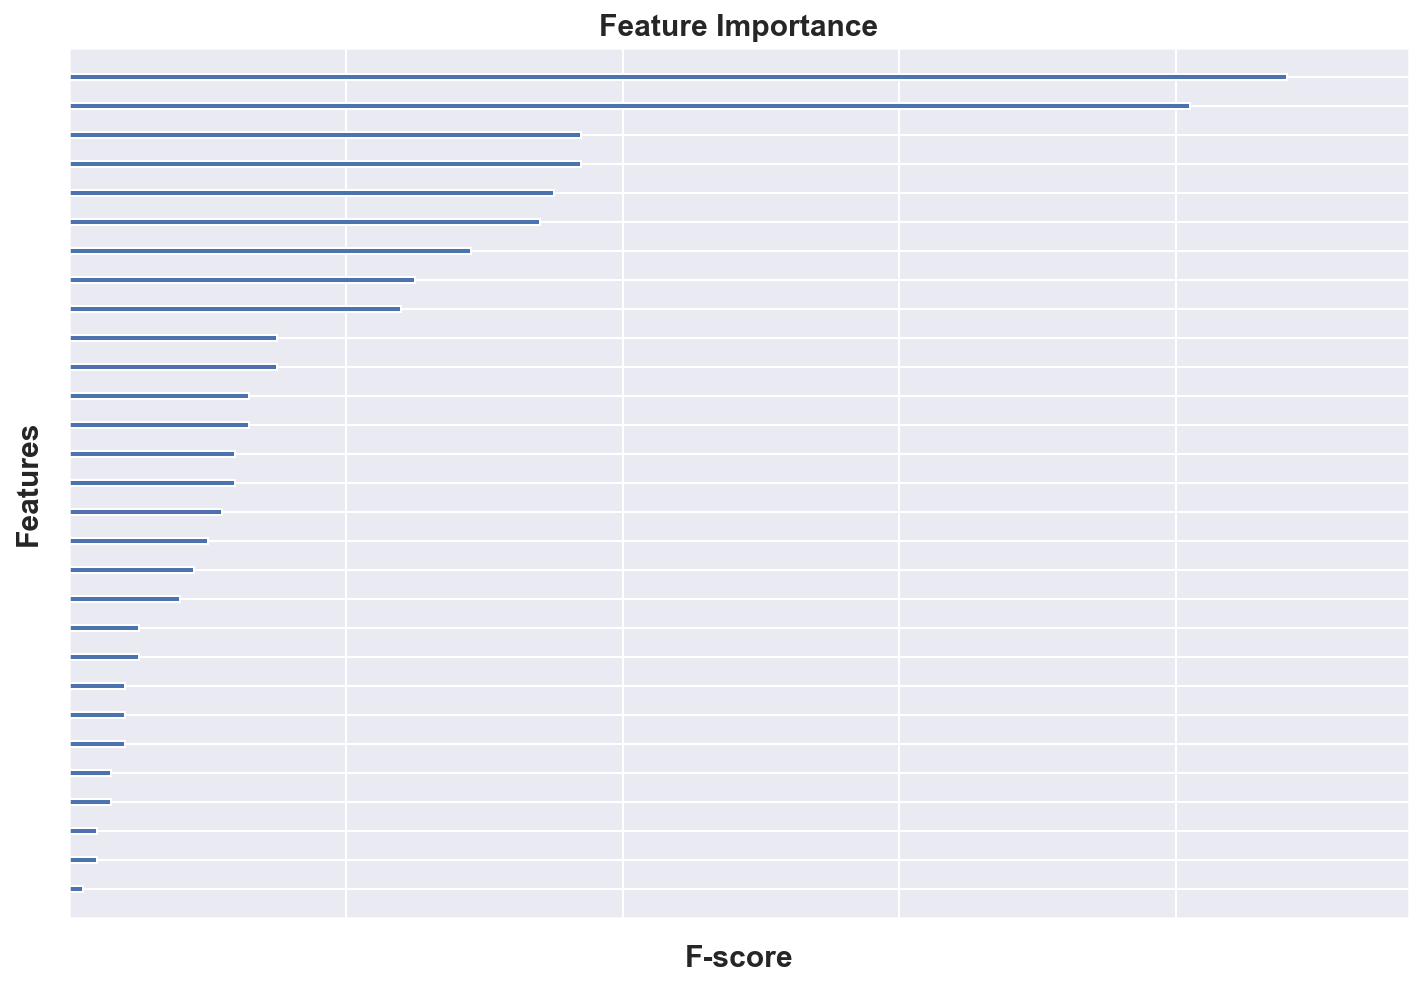

In [123]:
fig, ax = plt.subplots(1,1,figsize=[12,8])
xgb.plot_importance(xg_reg, ax=ax)
ax.set_title('Feature Importance', fontsize = 15, weight='bold')
ax.set_ylabel('Features', fontsize = 15, weight='bold')
ax.set_xlabel('F-score', fontsize = 15, weight='bold')

## Conclusion
[To Top](#Top)

Best model achieved was from XGBoost, with a R^2 score of 0.78, and RMSE of $2.08

In descending order, the features that affect the daily price of a listing include the occupancy size, neighbourhood, cleaning fee, number of bedrooms and minimum nights.

For further improvements, the model can be further stress-tested by:
- Accounting for seasonality in price;
- Using PolynomialFeatures to explore interactions of features
- Translating non-english reviews to account for more accurate polarity scores